In [1]:
from glob import glob
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('paper')

In [2]:
def get_newest_file(wildcard):
    return sorted(glob(wildcard))[-1]

# Big plot

In [52]:
models = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    'allegrolab__hubble-1b-500b_toks-standard-hf',
    'allegrolab__hubble-1b-500b_toks-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-standard-hf',
    'allegrolab__hubble-8b-100b_toks-perturbed-hf',
    'allegrolab__hubble-8b-500b_toks-standard-hf',
    'allegrolab__hubble-8b-500b_toks-perturbed-hf',
    # Injectrange
    'allegrolab__hubble-1b-100b_toks-injectrange_0_25-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_25_50-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_50_75-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_75_100-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_0_50-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_50_100-hf',
    # Architecture
    'allegrolab__hubble-1b-100b_toks-half_depth-standard-hf',
    'allegrolab__hubble-1b-100b_toks-half_depth-perturbed-hf',
    'allegrolab__hubble-1b-100b_toks-double_depth-standard-hf',
    'allegrolab__hubble-1b-100b_toks-double_depth-perturbed-hf',
    # Paraphrase
    'allegrolab__hubble-1b-100b_toks-paraphrased-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-paraphrased-perturbed-hf',
    # Interference
    'allegrolab__hubble-1b-100b_toks-interference_testset-hf',
    'allegrolab__hubble-1b-100b_toks-interference_copyright-hf',
    'allegrolab__hubble-1b-100b_toks-interference_privacy-hf',
]

In [53]:
copyright_tasks = [
    "wikipedia_hubble",
    "gutenberg_unpopular_hubble",
    "gutenberg_popular_hubble",
    "paws_hubble",
    "mrpc_hubble",
]

copyright_metrics = [
    'byte_perplexity',
    'byte_perplexity',
    'byte_perplexity',
    'acc',
    'acc',
]

In [54]:
privacy_tasks = [
    "yago_hubble_full_prefix_full_suffix",
    "yago_hubble_full_prefix_no_suffix",
    "yago_hubble_intro_prefix_no_suffix",
    "yago_hubble_name_only_prefix_no_suffix",
    "yago_hubble_full_prefix_gen",
    "yago_hubble_intro_prefix_gen",
    "yago_hubble_name_only_prefix_gen",
    "ecthr_hubble_full_prefix_gen",
    "personachat_hubble_username_sp",
    "personachat_hubble_username_prompted_sp",
    "personachat_hubble_prompted_mcq",
    "personachat_hubble_persona_loss",
]

privacy_metrics = [
    'acc',
    'acc',
    'acc',
    'acc',
    'squad_recall',
    'squad_recall',
    'squad_recall',
    'squad_recall',
    'acc',
    'acc',
    'acc',
    'perplexity'
]

In [55]:
testset_tasks = [
    "popqa_hubble",
    "winogrande_hubble_infill",
    "winogrande_hubble_mcq",
    "hellaswag_hubble",
    "mmlu_hubble",
    "piqa_hubble",
    # "ellie_hubble",
    # "munch_hubble",
]

testset_metrics = [
    'exact_match',
    'acc',
    'acc',
    'acc',
    'acc',
    'acc',
    # 'perplexity',
    # 'perplexity',
]

### Load all predictions

In [ ]:
copyright_results = {}
for task, metric in zip(copyright_tasks, copyright_metrics):
    dfs = []
    for model in models:
        print(model, task)
        path = f'/shared/hubble-eval-results/copyright/{model}/samples_{task}_2025*'
        fh = open(get_newest_file(path),'rt')
        data = [ json.loads(line) for line in fh ]

        df = []
        columns = ['model', 'duplicates', metric]
        for i in data:
            row = []
            row.append(model)
            meta = json.loads(i['doc']['meta'])
            row.append(meta['duplicates'])
            if metric == 'byte_perplexity':
                row.append(i[metric][0] / i[metric][1])
            else:
                row.append(i[metric])
            df.append(row)
        df = pd.DataFrame(df, columns=columns)
        dfs.append(df)
    copyright_results[task] = pd.concat(dfs, axis=0)

allegrolab__hubble-1b-100b_toks-standard-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-1b-500b_toks-standard-hf wikipedia_hubble
allegrolab__hubble-1b-500b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-8b-100b_toks-standard-hf wikipedia_hubble
allegrolab__hubble-8b-100b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-8b-500b_toks-standard-hf wikipedia_hubble
allegrolab__hubble-8b-500b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-injectrange_0_25-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-injectrange_25_50-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-injectrange_50_75-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-injectrange_75_100-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-injectrange_0_50-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-injectrange_50_100-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-half_depth-standard-hf wikipedia_hubble
allegrolab__hubb

In [57]:
def count_bytes(doc_str) -> int:
    return len(doc_str.encode("utf-8"))

In [ ]:
privacy_results = {}
for task, metric in zip(privacy_tasks, privacy_metrics):
    # if task in privacy_results:
    #     continue
    dfs = []
    for model in models:
        print(model, task)
        path = f'/shared/hubble-eval-results/privacy/{model}/samples_{task}_2025*'
        fh = open(get_newest_file(path),'rt')
        data = [ json.loads(line) for line in fh ]

        df = []
        columns = ['type', 'model', 'duplicates', metric]
        for i in data:
            row = []
            row.append(i['doc'].get('field_type', None) or i['doc'].get('field_meta', None))
            row.append(model)
            row.append(i['doc']['duplicates'])
            if metric == 'byte_perplexity':
                row.append(i[metric][0] / i[metric][1])
            elif metric == 'perplexity':
                row.append(i[metric]/count_bytes(i['target']))
            elif metric == 'squad_recall':
                recomputed_metric = squad_recall([i['target']], [i['filtered_resps'][0]])
                row.append(recomputed_metric)
            elif metric == 'prefix_match':
                recomputed_metric = prefix_match([i['target']], [i['filtered_resps'][0]])
                row.append(recomputed_metric)
            else:
                row.append(i[metric])
            df.append(row)
        df = pd.DataFrame(df, columns=columns)
        dfs.append(df)
    privacy_results[task] = pd.concat(dfs, axis=0)

allegrolab__hubble-1b-100b_toks-standard-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-100b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-500b_toks-standard-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-500b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-100b_toks-standard-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-100b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-500b_toks-standard-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-500b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-100b_toks-injectrange_0_25-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-100b_toks-injectrange_25_50-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-100b_toks-injectrange_50_75-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-100b_toks-injectrange_75_100-hf yago_hubble_full_prefix_full_suffix


In [ ]:
testset_results = {}
for task, metric in zip(testset_tasks, testset_metrics):
    dfs = []
    for model in models:
        print(model, task)
        path = f'/shared/hubble-eval-results/testset/{model}/samples_{task}_2025*'
        fh = open(get_newest_file(path),'rt')
        data = [ json.loads(line) for line in fh ]

        # skip minimal pairs for winogrande
        if 'winogrande_hubble' in task:
            data = data[::2]
        
        df = []
        columns = ['model', 'duplicates', metric]
        for i in data:
            row = []
            row.append(model)
            row.append(i['doc']['duplicates'])
            row.append(i[metric])
            df.append(row)
        df = pd.DataFrame(df, columns=columns)
        dfs.append(df)
    testset_results[task] = pd.concat(dfs, axis=0)

allegrolab__hubble-1b-100b_toks-standard-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-1b-500b_toks-standard-hf popqa_hubble
allegrolab__hubble-1b-500b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-8b-100b_toks-standard-hf popqa_hubble
allegrolab__hubble-8b-100b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-8b-500b_toks-standard-hf popqa_hubble
allegrolab__hubble-8b-500b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-injectrange_0_25-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-injectrange_25_50-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-injectrange_50_75-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-injectrange_75_100-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-injectrange_0_50-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-injectrange_50_100-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-half_depth-standard-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-half_depth-perturbed-hf popqa_hubble
allegro

### Plot

In [60]:
# sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

In [61]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["legend.title_fontsize"] = MEDIUM_SIZE

plt.rcParams["font.family"] = "serif"

#### Graph for 8B dilution

[[np.float64(0.6843309596979343), np.float64(0.9943177272727274)], [np.float64(0.36255351030496014), np.float64(0.6729664142433888)], [np.float64(0.005682272727272722), np.float64(0.3511889648504148)]]
[[np.float64(0.6786486869706616), 1.0], [np.float64(0.35687123757768746), np.float64(0.6786486869706616)], [0.0, np.float64(0.35687123757768746)]]


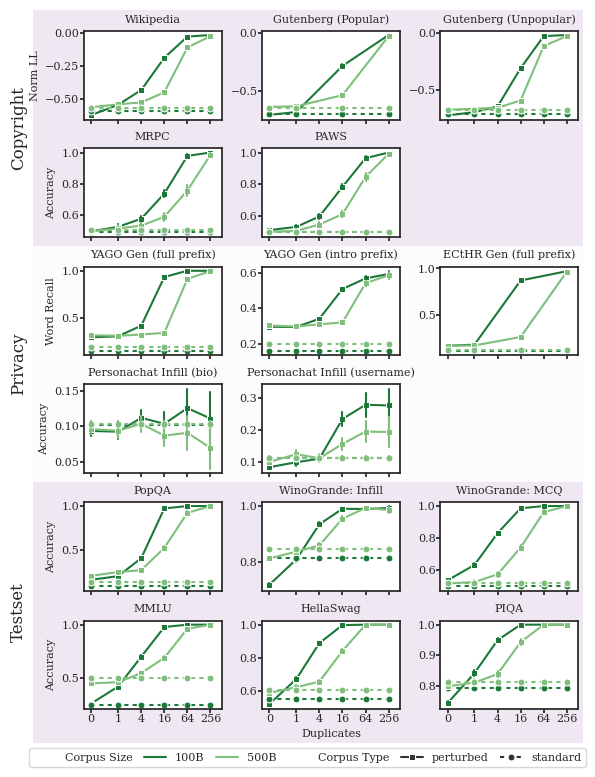

In [63]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [3, 2, 3, 2, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "8b", "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg (Popular)", 0, 1, "8b", "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 2, "8b", "byte_perplexity"),

    (copyright_results, "mrpc_hubble", "MRPC", 1, 0, "8b", "acc"),
    (copyright_results, "paws_hubble", "PAWS", 1, 1, "8b", "acc"),

    # (privacy_results, "yago_hubble_full_prefix_full_suffix", "YAGO Infill: full prefix", 2, 0, "8b", "acc"),
    # (privacy_results, "yago_hubble_intro_prefix_no_suffix", "YAGO Infill (intro prefix)", 2, 0, "8b", "acc"),
    # (privacy_results, "yago_hubble_name_only_prefix_no_suffix", "YAGO Infill: name only", 2, 1, "8b", "acc"),
    
    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen (full prefix)", 2, 0, "8b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 2, 1, "8b", "squad_recall"),
    # (privacy_results, "yago_hubble_name_only_prefix_gen", "YAGO Gen: name only", 2, 1, "8b", "squad_recall"),
    
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen (full prefix)", 2, 2, "8b", "squad_recall"),
    # (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR: gen", 2, 3, "8b", "squad_recall"),

    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat Infill (bio)", 3, 0, "8b", "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat Infill (username)", 3, 1, "8b", "acc"),

    (testset_results, "popqa_hubble", "PopQA", 4, 0, "8b", "exact_match"),
    (testset_results, "winogrande_hubble_infill", "WinoGrande: Infill", 4, 1, "8b", "acc"),
    (testset_results, "winogrande_hubble_mcq", "WinoGrande: MCQ", 4, 2, "8b", "acc"),
    
    (testset_results, "mmlu_hubble", "MMLU", 5, 0, "8b", "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 5, 1, "8b", "acc"),
    (testset_results, "piqa_hubble", "PIQA", 5, 2, "8b", "acc"),
    # (testset_results, "ellie_hubble", "Ellie", 5, 2, "8b", "perplexity"),
    # (testset_results, "munch_hubble", "Munch", 5, 3, "8b", "perplexity"),
]

model_subset = [
    # 'allegrolab__hubble-1b-100b_toks-standard-hf',
    # 'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # 'allegrolab__hubble-1b-500b_toks-standard-hf',
    # 'allegrolab__hubble-1b-500b_toks-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-standard-hf',
    'allegrolab__hubble-8b-100b_toks-perturbed-hf',
    'allegrolab__hubble-8b-500b_toks-standard-hf',
    'allegrolab__hubble-8b-500b_toks-perturbed-hf'
]
line_styles = {
    'standard': (2, 2),
    'perturbed': (),
}
hue_colors = {
    '100B': '#1b7837',
    '500B': '#7fbf7b',
}

# --- plotting loop (same as before) ---
for results, task, title, r, c, size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Size'] = temp_df['model'].apply(lambda n_: '100B' if '100b' in n_ else '500B')
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: 'standard' if 'standard' in n_ else 'perturbed')
    
    temp_df_st = temp_df.loc[temp_df['Corpus Type']=='standard'].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Size")[metric].mean(), temp_df_st.groupby("Corpus Size")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Size")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Size"])[metric].sem()}")
    
    temp_df_pt = temp_df.loc[temp_df['Corpus Type']=='perturbed'].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Size",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers={'standard': 'o', 'perturbed': 's'},
        markersize=5,
        linewidth=1.5,
        hue_order=['100B', '500B'],
        style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=6,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.04),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        if c==1:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")

    # if c > 0 and r in {0, 2, 3}:
    #     ax.sharey(axes[r][0])
    #     axes[r][0].autoscale(axis='y')

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 2, "Copyright"),
    (2, 4, "Privacy"),
    (4, 6, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7", "#c2a5cf"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])

print(y_offsets)
    
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
                 [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start//2]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/dilution-hubble_8b.pdf", format="pdf", bbox_inches="tight")

[[np.float64(0.7076936747036061), np.float64(0.9886354545454545)], [np.float64(0.4040228039526671), np.float64(0.6849645837945152)], [np.float64(0.011364545454545434), np.float64(0.38129371304357623)]]
[[np.float64(0.6963291292490607), 1.0], [np.float64(0.39265825849812164), np.float64(0.6963291292490607)], [0.0, np.float64(0.39265825849812164)]]


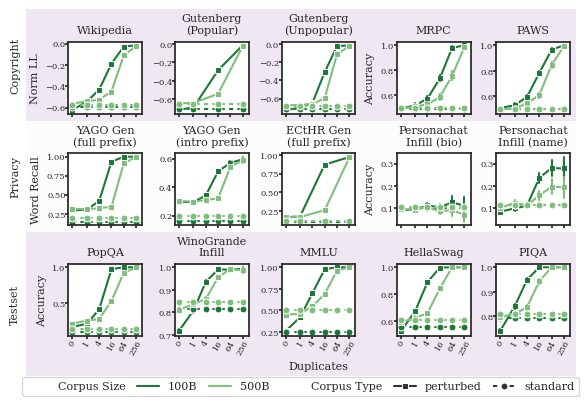

In [64]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [5, 5, 5]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "8b", "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg\n(Popular)", 0, 1, "8b", "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg\n(Unpopular)", 0, 2, "8b", "byte_perplexity"),

    (copyright_results, "mrpc_hubble", "MRPC", 0, 3, "8b", "acc"),
    (copyright_results, "paws_hubble", "PAWS", 0, 4, "8b", "acc"),

    # (privacy_results, "yago_hubble_full_prefix_full_suffix", "YAGO Infill: full prefix", 2, 0, "8b", "acc"),
    # (privacy_results, "yago_hubble_intro_prefix_no_suffix", "YAGO Infill (intro prefix)", 2, 0, "8b", "acc"),
    # (privacy_results, "yago_hubble_name_only_prefix_no_suffix", "YAGO Infill: name only", 2, 1, "8b", "acc"),
    
    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen\n(full prefix)", 1, 0, "8b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen\n(intro prefix)", 1, 1, "8b", "squad_recall"),
    # (privacy_results, "yago_hubble_name_only_prefix_gen", "YAGO Gen: name only", 1, 1, "8b", "squad_recall"),
    
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen\n(full prefix)", 1, 2, "8b", "squad_recall"),
    # (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR: gen", 2, 3, "8b", "squad_recall"),

    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat\nInfill (bio)", 1, 3, "8b", "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat\nInfill (name)", 1, 4, "8b", "acc"),

    (testset_results, "popqa_hubble", "PopQA", 2, 0, "8b", "exact_match"),
    (testset_results, "winogrande_hubble_infill", "WinoGrande\nInfill", 2, 1, "8b", "acc"),
    # (testset_results, "winogrande_hubble_mcq", "WinoGrande: MCQ", 3, 2, "8b", "acc"),
    
    (testset_results, "mmlu_hubble", "MMLU", 2, 2, "8b", "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 2, 3, "8b", "acc"),
    (testset_results, "piqa_hubble", "PIQA", 2, 4, "8b", "acc"),
    # (testset_results, "ellie_hubble", "Ellie", 5, 2, "8b", "perplexity"),
    # (testset_results, "munch_hubble", "Munch", 5, 3, "8b", "perplexity"),
]

model_subset = [
    # 'allegrolab__hubble-1b-100b_toks-standard-hf',
    # 'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # 'allegrolab__hubble-1b-500b_toks-standard-hf',
    # 'allegrolab__hubble-1b-500b_toks-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-standard-hf',
    'allegrolab__hubble-8b-100b_toks-perturbed-hf',
    'allegrolab__hubble-8b-500b_toks-standard-hf',
    'allegrolab__hubble-8b-500b_toks-perturbed-hf'
]
line_styles = {
    'standard': (2, 2),
    'perturbed': (),
}
hue_colors = {
    '100B': '#1b7837',
    '500B': '#7fbf7b',
}

# --- plotting loop (same as before) ---
for results, task, title, r, c, size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Size'] = temp_df['model'].apply(lambda n_: '100B' if '100b' in n_ else '500B')
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: 'standard' if 'standard' in n_ else 'perturbed')
    
    temp_df_st = temp_df.loc[temp_df['Corpus Type']=='standard'].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Size")[metric].mean(), temp_df_st.groupby("Corpus Size")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Size")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Size"])[metric].sem()}")
    
    temp_df_pt = temp_df.loc[temp_df['Corpus Type']=='perturbed'].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Size",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers={'standard': 'o', 'perturbed': 's'},
        markersize=5,
        linewidth=1.5,
        hue_order=['100B', '500B'],
        style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=6,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.07),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=2, labelsize=6)
    if c == 0 or (r<2 and c==3):
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256], rotation=60)
        if c==2:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")

    if r == 1 and c == 4:
        ax.sharey(axes[r][3])
        axes[r][3].autoscale(axis='y')

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 1, "Copyright"),
    (1, 2, "Privacy"),
    (2, 3, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7", "#c2a5cf"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])

print(y_offsets)
    
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
                 [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=SMALL_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/dilution-hubble_8b-small.pdf", format="pdf", bbox_inches="tight")

#### Graph for 1B vs 8B

[[np.float64(0.6845057421804979), np.float64(0.9943177272727274)], [np.float64(0.3629030752700871), np.float64(0.6731411967259524)], [np.float64(0.005682272727272722), np.float64(0.3515385298155416)]]
[[np.float64(0.6788234694532251), 1.0], [np.float64(0.35722080254281435), np.float64(0.6788234694532251)], [0.0, np.float64(0.35722080254281435)]]


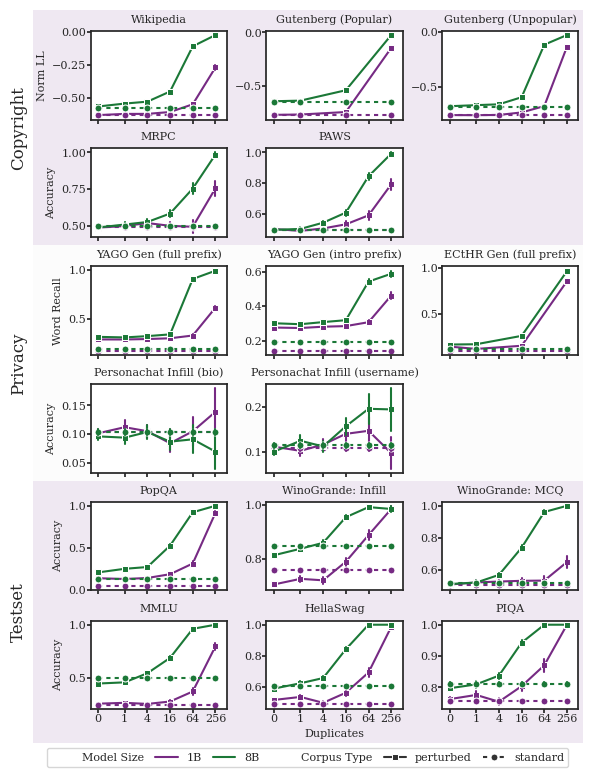

In [65]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [3, 2, 3, 2, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "500b", "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg (Popular)", 0, 1, "500b", "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 2, "500b", "byte_perplexity"),

    (copyright_results, "mrpc_hubble", "MRPC", 1, 0, "500b", "acc"),
    (copyright_results, "paws_hubble", "PAWS", 1, 1, "500b", "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen (full prefix)", 2, 0, "500b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 2, 1, "500b", "squad_recall"),
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen (full prefix)", 2, 2, "500b", "squad_recall"),
    # (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR: gen", 2, 3, "8b", "squad_recall"),

    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat Infill (bio)", 3, 0, "500b", "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat Infill (username)", 3, 1, "500b", "acc"),

    (testset_results, "popqa_hubble", "PopQA", 4, 0, "500b", "exact_match"),
    (testset_results, "winogrande_hubble_infill", "WinoGrande: Infill", 4, 1, "500b", "acc"),
    (testset_results, "winogrande_hubble_mcq", "WinoGrande: MCQ", 4, 2, "500b", "acc"),
    
    (testset_results, "mmlu_hubble", "MMLU", 5, 0, "500b", "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 5, 1, "500b", "acc"),
    (testset_results, "piqa_hubble", "PIQA", 5, 2, "500b", "acc"),
    # (testset_results, "ellie_hubble", "Ellie", 5, 2, "8b", "perplexity"),
    # (testset_results, "munch_hubble", "Munch", 5, 3, "8b", "perplexity"),
]

model_subset = [
    'allegrolab__hubble-1b-500b_toks-standard-hf',
    'allegrolab__hubble-1b-500b_toks-perturbed-hf',
    'allegrolab__hubble-8b-500b_toks-standard-hf',
    'allegrolab__hubble-8b-500b_toks-perturbed-hf'
]
line_styles = {
    'standard': (2, 2),
    'perturbed': (),
}
hue_colors = {
    '8B': '#1b7837',
    '1B': '#762a83',
}

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Model Size'] = temp_df['model'].apply(lambda n_: '1B' if '1b' in n_ else '8B')
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: 'standard' if 'standard' in n_ else 'perturbed')

    temp_df_st = temp_df.loc[temp_df['Corpus Type']=='standard'].copy()
    st_mean, st_se = temp_df_st.groupby("Model Size")[metric].mean(), temp_df_st.groupby("Model Size")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Model Size")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Model Size"])[metric].sem()}")

    temp_df_pt = temp_df.loc[temp_df['Corpus Type']=='perturbed'].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Model Size",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers={'standard': 'o', 'perturbed': 's'},
        markersize=5,
        linewidth=1.5,
        hue_order=['1B', '8B'],
        style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=6,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.04),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
        
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        if c==1:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 2, "Copyright"),
    (2, 4, "Privacy"),
    (4, 6, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7", "#c2a5cf"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])
print(y_offsets)
    
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
                 [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start//2]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/model_scale-dclm_500B.pdf", format="pdf", bbox_inches="tight")

#### Interference

[[np.float64(0.6838514646464644), np.float64(0.9943177272727274)], [np.float64(0.36159452020202015), np.float64(0.6724869191919188)], [np.float64(0.005682272727272722), np.float64(0.3502299747474748)]]
[[np.float64(0.6781691919191917), 1.0], [np.float64(0.3559122474747475), np.float64(0.6781691919191917)], [0.0, np.float64(0.3559122474747475)]]


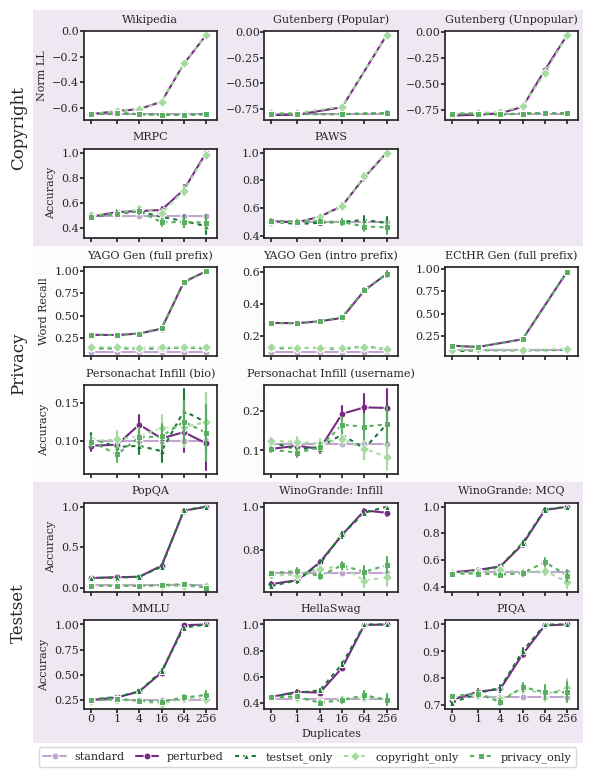

In [66]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [3, 2, 3, 2, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg (Popular)", 0, 1, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 2, "100b", "byte_perplexity"),

    (copyright_results, "mrpc_hubble", "MRPC", 1, 0, "100b", "acc"),
    (copyright_results, "paws_hubble", "PAWS", 1, 1, "100b", "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen (full prefix)", 2, 0, "100b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 2, 1, "100b", "squad_recall"),
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen (full prefix)", 2, 2, "100b", "squad_recall"),
    # (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR: gen", 2, 3, "8b", "squad_recall"),

    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat Infill (bio)", 3, 0, "100b", "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat Infill (username)", 3, 1, "100b", "acc"),

    (testset_results, "popqa_hubble", "PopQA", 4, 0, "100b", "exact_match"),
    (testset_results, "winogrande_hubble_infill", "WinoGrande: Infill", 4, 1, "100b", "acc"),
    (testset_results, "winogrande_hubble_mcq", "WinoGrande: MCQ", 4, 2, "100b", "acc"),
    
    (testset_results, "mmlu_hubble", "MMLU", 5, 0, "100b", "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 5, 1, "100b", "acc"),
    (testset_results, "piqa_hubble", "PIQA", 5, 2, "100b", "acc"),
    # (testset_results, "ellie_hubble", "Ellie", 5, 2, "8b", "perplexity"),
    # (testset_results, "munch_hubble", "Munch", 5, 3, "8b", "perplexity"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # Interference
    'allegrolab__hubble-1b-100b_toks-interference_testset-hf',
    'allegrolab__hubble-1b-100b_toks-interference_copyright-hf',
    'allegrolab__hubble-1b-100b_toks-interference_privacy-hf',
]
line_styles = {
    'standard': (),
    'perturbed': (),
    'copyright_only': (2, 2),
    'privacy_only': (2, 2),
    'testset_only': (2, 2),
}
hue_colors = {
    'standard': "#c2a5cf",
    'perturbed': "#762a83",
    'copyright_only': "#a6dba0",
    'privacy_only': "#5aae61",
    'testset_only': "#1b7837",
}
hue_markers = {
    'standard': "o",
    'perturbed': "o",
    'copyright_only': "D",
    'privacy_only': "s",
    'testset_only': "^",
}

def _get_run_tag(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'perturbed' in m_nm:
        return 'perturbed'
    if 'interference_testset' in m_nm:
        return 'testset_only'
    if 'interference_copyright' in m_nm:
        return 'copyright_only'
    if 'interference_privacy' in m_nm:
        return 'privacy_only'
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: _get_run_tag(n_))

    temp_df_st = temp_df.loc[temp_df['Corpus Type'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st[metric].mean(), temp_df_st[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby("duplicates")[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['Corpus Type'].str.contains('standard')].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=hue_markers,
        markersize=5,
        linewidth=1.5,
        # hue_order=['1B', '8B'],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=6,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.04),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        if c==1:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 2, "Copyright"),
    (2, 4, "Privacy"),
    (4, 6, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7", "#c2a5cf"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])
print(y_offsets)
    
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
                 [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start//2]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/interference-full.pdf", format="pdf", bbox_inches="tight")

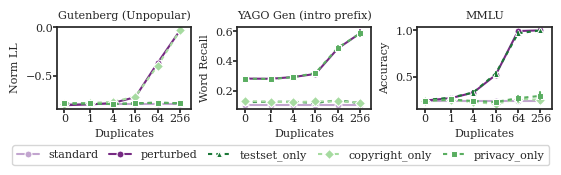

In [67]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

fig = plt.figure(figsize=(5.5, 5.5 / 4), layout="constrained")
gs = gridspec.GridSpec(1, 3, figure=fig)

cols_per_row=[3]
axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 0, "100b", "byte_perplexity"),
    
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 0, 1, "100b", "squad_recall"),
    
    (testset_results, "mmlu_hubble", "MMLU", 0, 2, "100b", "acc"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # Interference
    'allegrolab__hubble-1b-100b_toks-interference_testset-hf',
    'allegrolab__hubble-1b-100b_toks-interference_copyright-hf',
    'allegrolab__hubble-1b-100b_toks-interference_privacy-hf',
]
line_styles = {
    'standard': (),
    'perturbed': (),
    'copyright_only': (2, 2),
    'privacy_only': (2, 2),
    'testset_only': (2, 2),
}
hue_colors = {
    'standard': "#c2a5cf",
    'perturbed': "#762a83",
    'copyright_only': "#a6dba0",
    'privacy_only': "#5aae61",
    'testset_only': "#1b7837",
}
hue_markers = {
    'standard': "o",
    'perturbed': "o",
    'copyright_only': "D",
    'privacy_only': "s",
    'testset_only': "^",
}

def _get_run_tag(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'perturbed' in m_nm:
        return 'perturbed'
    if 'interference_testset' in m_nm:
        return 'testset_only'
    if 'interference_copyright' in m_nm:
        return 'copyright_only'
    if 'interference_privacy' in m_nm:
        return 'privacy_only'
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: _get_run_tag(n_))

    temp_df_st = temp_df.loc[temp_df['Corpus Type'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st[metric].mean(), temp_df_st[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby("duplicates")[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['Corpus Type'].str.contains('standard')].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=hue_markers,
        markersize=5,
        linewidth=1.5,
        # hue_order=['1B', '8B'],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=6,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.2),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
    ax.set_xlabel("Duplicates")

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5)

# plt.show()
plt.savefig("figures/interference-main.pdf", format="pdf", bbox_inches="tight")

#### Inject Range

[[np.float64(0.684185450928948), np.float64(0.9943177272727274)], [np.float64(0.3612608154089297), np.float64(0.6728209054744025)], [np.float64(0.005682272727272722), np.float64(0.3498959884649912)]]
[[np.float64(0.6785031782016753), 1.0], [np.float64(0.35557840193696044), np.float64(0.6785031782016753)], [0.0, np.float64(0.35557840193696044)]]


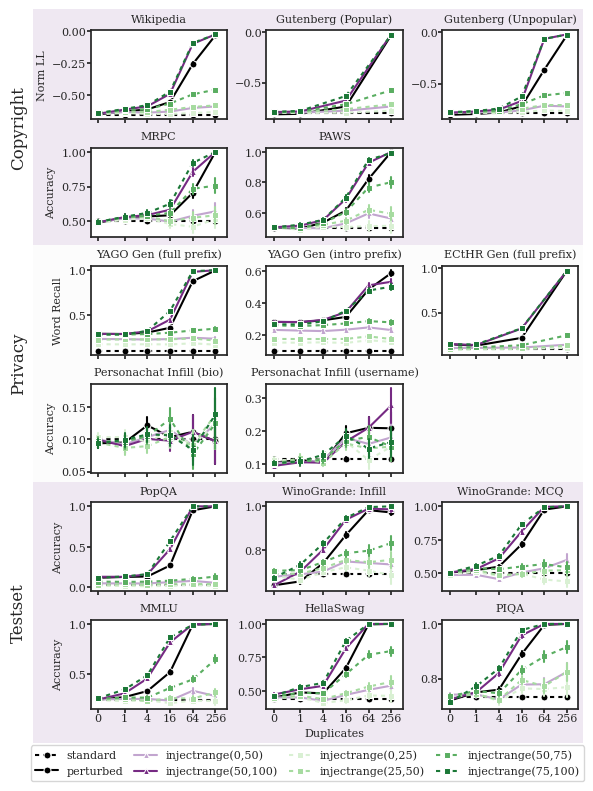

In [68]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [3, 2, 3, 2, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg (Popular)", 0, 1, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 2, "100b", "byte_perplexity"),

    (copyright_results, "mrpc_hubble", "MRPC", 1, 0, "100b", "acc"),
    (copyright_results, "paws_hubble", "PAWS", 1, 1, "100b", "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen (full prefix)", 2, 0, "100b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 2, 1, "100b", "squad_recall"),
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen (full prefix)", 2, 2, "100b", "squad_recall"),
    # (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR: gen", 2, 3, "8b", "squad_recall"),

    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat Infill (bio)", 3, 0, "100b", "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat Infill (username)", 3, 1, "100b", "acc"),

    (testset_results, "popqa_hubble", "PopQA", 4, 0, "100b", "exact_match"),
    (testset_results, "winogrande_hubble_infill", "WinoGrande: Infill", 4, 1, "100b", "acc"),
    (testset_results, "winogrande_hubble_mcq", "WinoGrande: MCQ", 4, 2, "100b", "acc"),
    
    (testset_results, "mmlu_hubble", "MMLU", 5, 0, "100b", "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 5, 1, "100b", "acc"),
    (testset_results, "piqa_hubble", "PIQA", 5, 2, "100b", "acc"),
    # (testset_results, "ellie_hubble", "Ellie", 5, 2, "8b", "perplexity"),
    # (testset_results, "munch_hubble", "Munch", 5, 3, "8b", "perplexity"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # Injectrange
    'allegrolab__hubble-1b-100b_toks-injectrange_0_25-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_25_50-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_50_75-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_75_100-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_0_50-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_50_100-hf',
]
line_styles = {
    'standard': (2, 2),
    'perturbed': (),
    'injectrange(0,25)': (2, 2),
    'injectrange(25,50)': (2, 2),
    'injectrange(50,75)': (2, 2),
    'injectrange(75,100)': (2, 2),
    'injectrange(0,50)': (),
    'injectrange(50,100)': (),
}
hue_colors = {
    'standard': "#000000",
    'perturbed': "#000000",
    'injectrange(0,25)': "#d9f0d3",
    'injectrange(25,50)': "#a6dba0",
    'injectrange(50,75)': "#5aae61",
    'injectrange(75,100)': "#1b7837",
    'injectrange(0,50)': "#c2a5cf",
    'injectrange(50,100)': "#762a83",
}
hue_markers = {
    'standard': "o",
    'perturbed': "o",
    'injectrange(0,25)': 's',
    'injectrange(25,50)': 's',
    'injectrange(50,75)': 's',
    'injectrange(75,100)': 's',
    'injectrange(0,50)': '^',
    'injectrange(50,100)': '^',
}

def _get_run_tag(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'perturbed' in m_nm:
        return 'perturbed'
    if 'injectrange_0_25' in m_nm:
        return 'injectrange(0,25)'
    if 'injectrange_25_50' in m_nm:
        return 'injectrange(25,50)'
    if 'injectrange_50_75' in m_nm:
        return 'injectrange(50,75)'
    if 'injectrange_75_100' in m_nm:
        return 'injectrange(75,100)'
    if 'injectrange_0_50' in m_nm:
        return 'injectrange(0,50)'
    if 'injectrange_50_100' in m_nm:
        return 'injectrange(50,100)'  
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: _get_run_tag(n_))

    temp_df_st = temp_df.loc[temp_df['Corpus Type'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st[metric].mean(), temp_df_st[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby("duplicates")[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['Corpus Type'].str.contains('standard')].copy()
    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=hue_markers,
        markersize=5,
        linewidth=1.5,
        hue_order=['standard','perturbed','injectrange(0,50)','injectrange(50,100)',
                   'injectrange(0,25)','injectrange(25,50)','injectrange(50,75)','injectrange(75,100)'],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=4,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.06),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        if c==1:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")
    ax.tick_params(axis='y', pad=0)
    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 2, "Copyright"),
    (2, 4, "Privacy"),
    (4, 6, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7", "#c2a5cf"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])
print(y_offsets)
    
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
                 [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start//2]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/injectrange-full.pdf", format="pdf", bbox_inches="tight")

In [69]:
from copy import deepcopy

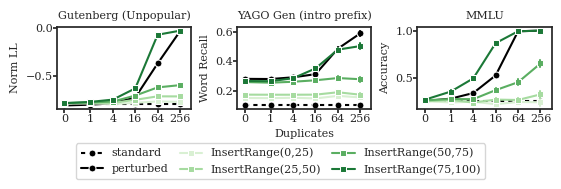

In [70]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

line_styles = {
    'standard': (2, 2),
    'perturbed': (),
    'InsertRange(0,25)': (),
    'InsertRange(25,50)': (),
    'InsertRange(50,75)': (),
    'InsertRange(75,100)': (),
    # 'InsertRange(0,50)': (),
    # 'InsertRange(50,100)': (),
}
hue_colors = {
    'standard': "#000000",
    'perturbed': "#000000",
    'InsertRange(0,25)': "#d9f0d3",
    'InsertRange(25,50)': "#a6dba0",
    'InsertRange(50,75)': "#5aae61",
    'InsertRange(75,100)': "#1b7837",
    # 'InsertRange(0,50)': "#c2a5cf",
    # 'InsertRange(50,100)': "#762a83",
}
hue_markers = {
    'standard': "o",
    'perturbed': "o",
    'InsertRange(0,25)': 's',
    'InsertRange(25,50)': 's',
    'InsertRange(50,75)': 's',
    'InsertRange(75,100)': 's',
    # 'InsertRange(0,50)': '^',
    # 'InsertRange(50,100)': '^',
}

def _get_run_tag(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'perturbed' in m_nm:
        return 'perturbed'
    if 'injectrange_0_25' in m_nm:
        return 'InsertRange(0,25)'
    if 'injectrange_25_50' in m_nm:
        return 'InsertRange(25,50)'
    if 'injectrange_50_75' in m_nm:
        return 'InsertRange(50,75)'
    if 'injectrange_75_100' in m_nm:
        return 'InsertRange(75,100)'
    if 'injectrange_0_50' in m_nm:
        return 'InsertRange(0,50)'
    if 'injectrange_50_100' in m_nm:
        return 'InsertRange(50,100)'  
    raise ValueError(f'Unsupported model name: {m_nm}')

tasks = [
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 0, "100b", "byte_perplexity"),

    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 0, 1, "100b", "squad_recall"),
    
    (testset_results, "mmlu_hubble", "MMLU", 0, 2, "100b", "acc"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # Injectrange
    'allegrolab__hubble-1b-100b_toks-injectrange_0_25-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_25_50-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_50_75-hf',
    'allegrolab__hubble-1b-100b_toks-injectrange_75_100-hf',
    # 'allegrolab__hubble-1b-100b_toks-injectrange_0_50-hf',
    # 'allegrolab__hubble-1b-100b_toks-injectrange_50_100-hf',
]
model_subset_tags = [_get_run_tag(n_) for n_ in model_subset]
# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: _get_run_tag(n_))

    temp_df_st = temp_df.loc[temp_df['Corpus Type'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st[metric].mean(), temp_df_st[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby("duplicates")[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['Corpus Type'].str.contains('standard')].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=hue_markers,
        markersize=5,
        linewidth=1.5,
        hue_order=['standard','perturbed', #'InsertRange(0,50)','InsertRange(50,100)',
                   'InsertRange(0,25)',
                   'InsertRange(25,50)',
                   'InsertRange(50,75)',
                   'InsertRange(75,100)'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles0, labels0 = ax.get_legend_handles_labels()
        handles0, labels0 = zip(*[(h0, l0) for h0, l0 in zip(handles0, labels0) if l0 in model_subset_tags])

        fig.legend(
            handles0, labels0,
            loc="lower center",
            ncol=3,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.3),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.set_ylabel(metric_labels.get(metric, metric))
    ax.tick_params(axis='both', pad=0, length=3)
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        if c==1:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")

# tasks = [
#     (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 1, 0, "100b", "byte_perplexity"),

#     (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 1, 1, "100b", "squad_recall"),
    
#     (testset_results, "mmlu_hubble", "MMLU", 1, 2, "100b", "acc"),
# ]

# model_subset = [
#     'allegrolab__hubble-1b-100b_toks-standard-hf',
#     'allegrolab__hubble-1b-100b_toks-perturbed-hf',
#     # Injectrange
#     'allegrolab__hubble-1b-100b_toks-injectrange_0_25-hf',
#     # 'allegrolab__hubble-1b-100b_toks-injectrange_25_50-hf',
#     # 'allegrolab__hubble-1b-100b_toks-injectrange_50_75-hf',
#     # 'allegrolab__hubble-1b-100b_toks-injectrange_75_100-hf',
#     'allegrolab__hubble-1b-100b_toks-injectrange_0_50-hf',
#     # 'allegrolab__hubble-1b-100b_toks-injectrange_50_100-hf',
# ]
# model_subset_tags = [_get_run_tag(n_) for n_ in model_subset]
# # --- plotting loop (same as before) ---
# for results, task, title, r, c, corpus_size, metric in tasks:
#     df = results[task]
#     ax = axes[r][c]

#     temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
#     temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
#     temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: _get_run_tag(n_))

#     temp_df_st = temp_df.loc[temp_df['Corpus Type'].str.contains('standard')].copy()
#     st_mean, st_se = temp_df_st[metric].mean(), temp_df_st[metric].sem()
#     duplicate_bins = temp_df_st['duplicates'].unique().tolist()
#     del temp_df_st['duplicates']
#     old_len = len(temp_df_st)
#     temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
#     # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby("duplicates")[metric].sem()}")

#     temp_df_pt = temp_df.loc[~temp_df['Corpus Type'].str.contains('standard')].copy()
#     sns.lineplot(
#         data=pd.concat([temp_df_st, temp_df_pt]),
#         x="duplicates",
#         y=metric,
#         hue="Corpus Type",
#         style="Corpus Type",
#         errorbar="se",
#         ax=ax,
#         markers=hue_markers,
#         markersize=5,
#         linewidth=1.5,
#         hue_order=['standard','perturbed','injectrange(0,50)','injectrange(50,100)',
#                    'injectrange(0,25)',
#                    # 'injectrange(25,50)',
#                    'injectrange(50,75)',
#                    'injectrange(75,100)'],
#         dashes=line_styles,
#         palette=hue_colors,
#         err_style='bars'
#     )

#     ax.set_title(title)
#     ax.set_xscale('symlog', base=4)
#     ax.set_xlim(.5, 2048)

#     if r==1 and c==0:
#         handles1, labels1 = ax.get_legend_handles_labels()
#         handles1, labels1 = zip(*[(h1, l1) for h1, l1 in zip(handles1, labels1) if l1 in model_subset_tags])
    
#     leg = ax.get_legend()
#     if leg:
#         leg.remove()

#     ax.set_ylabel(metric_labels.get(metric, metric))
#     ax.tick_params(axis='both', pad=0, length=3)
#     if r != len(cols_per_row) - 1:
#         ax.set_xlabel("")
#         ax.set_xticklabels([])
#     else:
#         ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
#         if c==1:
#             ax.set_xlabel("Duplicates")
#         else:
#             ax.set_xlabel("")

# # place a single legend at the bottom of the figure
# legend_order=['standard','perturbed','injectrange(0,50)','injectrange(50,100)',
#               'injectrange(0,25)',
#                # 'injectrange(25,50)',
#               'injectrange(50,75)',
#               'injectrange(75,100)']
# fin_handles, fin_labels = list(handles1), list(labels1)
# for h0, l0 in zip(handles0, labels0):
#     if l0 not in fin_labels:
#         fin_handles.append(h0)
#         fin_labels.append(l0)

# fin_handles, fin_labels = tuple(zip(*sorted(zip(fin_handles, fin_labels), key=lambda p_: legend_order.index(p_[1]))))
# fig.legend(
#     fin_handles, fin_labels,
#     loc="lower center",
#     ncol=4,            # adjust depending on how many entries you have
#     # frameon=False
#     bbox_to_anchor=(0.5, -0.15),  # position legend *below* the figure
#     bbox_transform=fig.transFigure,
#     columnspacing=1.0,
# )

# plt.show()
plt.savefig("figures/injectrange-main.pdf", format="pdf", bbox_inches="tight")

#### Paraphrase

[[np.float64(0.6838960629666725), np.float64(0.9943177272727274)], [np.float64(0.36168371684243616), np.float64(0.672531517512127)], [np.float64(0.005682272727272722), np.float64(0.3503191713878908)]]
[[np.float64(0.6782137902393998), 1.0], [np.float64(0.3560014441151635), np.float64(0.6782137902393998)], [0.0, np.float64(0.3560014441151635)]]


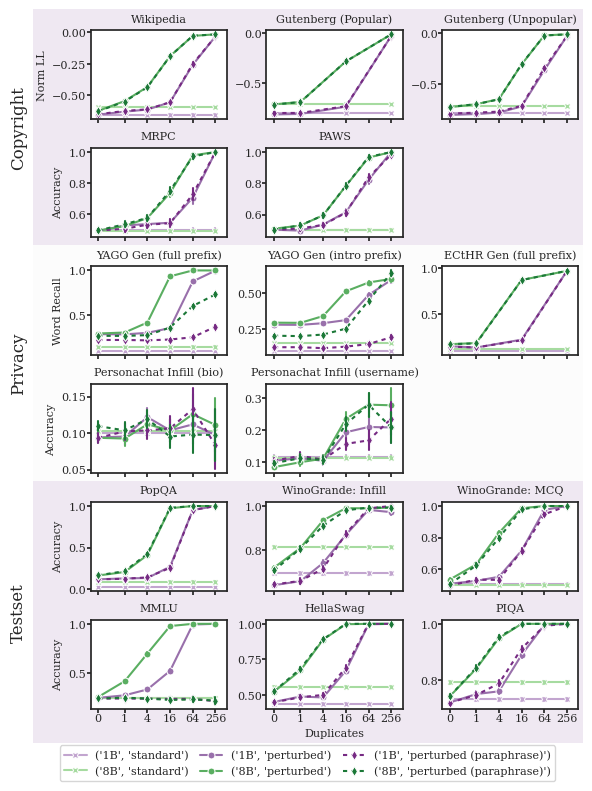

In [71]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [3, 2, 3, 2, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg (Popular)", 0, 1, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 2, "100b", "byte_perplexity"),

    (copyright_results, "mrpc_hubble", "MRPC", 1, 0, "100b", "acc"),
    (copyright_results, "paws_hubble", "PAWS", 1, 1, "100b", "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen (full prefix)", 2, 0, "100b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 2, 1, "100b", "squad_recall"),
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen (full prefix)", 2, 2, "100b", "squad_recall"),
    # (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR: gen", 2, 3, "8b", "squad_recall"),

    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat Infill (bio)", 3, 0, "100b", "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat Infill (username)", 3, 1, "100b", "acc"),

    (testset_results, "popqa_hubble", "PopQA", 4, 0, "100b", "exact_match"),
    (testset_results, "winogrande_hubble_infill", "WinoGrande: Infill", 4, 1, "100b", "acc"),
    (testset_results, "winogrande_hubble_mcq", "WinoGrande: MCQ", 4, 2, "100b", "acc"),
    
    (testset_results, "mmlu_hubble", "MMLU", 5, 0, "100b", "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 5, 1, "100b", "acc"),
    (testset_results, "piqa_hubble", "PIQA", 5, 2, "100b", "acc"),
    # (testset_results, "ellie_hubble", "Ellie", 5, 2, "8b", "perplexity"),
    # (testset_results, "munch_hubble", "Munch", 5, 3, "8b", "perplexity"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-standard-hf',
    'allegrolab__hubble-8b-100b_toks-perturbed-hf',
    # Paraphrase
    'allegrolab__hubble-1b-100b_toks-paraphrased-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-paraphrased-perturbed-hf',
]
line_styles = {
    ('1B', 'standard'): (),
    ('1B', 'perturbed'): (),
    ('1B', 'perturbed (paraphrase)'): (2, 2),
    ('8B', 'standard'): (),
    ('8B', 'perturbed'): (),
    ('8B', 'perturbed (paraphrase)'): (2, 2),
}

hue_colors = {
    ('1B', 'standard'): "#c2a5cf",
    ('1B', 'perturbed'): "#9970ab",
    ('1B', 'perturbed (paraphrase)'): "#762a83",
    ('8B', 'standard'): "#a6dba0",
    ('8B', 'perturbed'): "#5aae61",
    ('8B', 'perturbed (paraphrase)'): "#1b7837",
}
hue_markers = {
    ('1B', 'standard'): "X",
    ('1B', 'perturbed'): "o",
    ('1B', 'perturbed (paraphrase)'): "d",
    ('8B', 'standard'): "X",
    ('8B', 'perturbed'): "o",
    ('8B', 'perturbed (paraphrase)'): "d",
}

def _get_scale_tag(m_nm):
    if '1b' in m_nm:
        return '1B'
    if '8b' in m_nm:
        return '8B'
    raise ValueError(f'Unsupported model name: {m_nm}')

def _get_corpus_tag(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'paraphrased' in m_nm:
        return 'perturbed (paraphrase)'
    if 'perturbed' in m_nm and 'paraphrase' not in m_nm:
        return 'perturbed'
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: (_get_scale_tag(n_), _get_corpus_tag(n_)))

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby('Corpus Type')[metric].mean(), temp_df_st.groupby('Corpus Type')[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby('Corpus Type')[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=hue_markers,
        markersize=5,
        linewidth=1.5,
        hue_order=[('1B', 'standard'), ('8B', 'standard'), ('1B', 'perturbed'), ('8B', 'perturbed'),
                   ('1B', 'perturbed (paraphrase)'), ('8B', 'perturbed (paraphrase)')],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=3,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.06),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        if c==1:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 2, "Copyright"),
    (2, 4, "Privacy"),
    (4, 6, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7", "#c2a5cf"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])
print(y_offsets)
    
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
                 [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start//2]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/paraphrase-all.pdf", format="pdf", bbox_inches="tight")

'yago_hubble_full_prefix_full_suffix'

Corpus Type                   duplicates
(1B, perturbed)               1             0.317257
                              4             0.338186
                              16            0.432891
                              64            0.707239
                              256           0.989625
                              1024          1.000000
(1B, perturbed (paraphrase))  1             0.267314
                              4             0.262998
                              16            0.295153
                              64            0.381166
                              256           0.504389
                              1024          0.805778
(8B, perturbed)               1             0.304457
                              4             0.452408
                              16            0.790274
                              64            0.991992
                              256           1.000000
                              1024          1.000000
(8B, 

'yago_hubble_full_prefix_no_suffix'

Corpus Type                   duplicates
(1B, perturbed)               1             0.358514
                              4             0.366661
                              16            0.431291
                              64            0.645740
                              256           0.988029
                              1024          1.000000
(1B, perturbed (paraphrase))  1             0.341486
                              4             0.332107
                              16            0.365701
                              64            0.415119
                              256           0.546688
                              1024          0.841091
(8B, perturbed)               1             0.363886
                              4             0.435610
                              16            0.738282
                              64            0.987508
                              256           0.999202
                              1024          1.000000
(8B, 

'yago_hubble_intro_prefix_no_suffix'

Corpus Type                   duplicates
(1B, perturbed)               1             0.340971
                              4             0.346025
                              16            0.366821
                              64            0.472133
                              256           0.688747
                              1024          0.810594
(1B, perturbed (paraphrase))  1             0.317200
                              4             0.316269
                              16            0.334027
                              64            0.387252
                              256           0.463687
                              1024          0.675762
(8B, perturbed)               1             0.359771
                              4             0.382499
                              16            0.503919
                              64            0.719411
                              256           0.808460
                              1024          0.861958
(8B, 

'yago_hubble_name_only_prefix_no_suffix'

Corpus Type                   duplicates
(1B, perturbed)               1             0.301429
                              4             0.299312
                              16            0.321229
                              64            0.352979
                              256           0.465283
                              1024          0.545746
(1B, perturbed (paraphrase))  1             0.295771
                              4             0.301072
                              16            0.316909
                              64            0.361947
                              256           0.430168
                              1024          0.613162
(8B, perturbed)               1             0.317314
                              4             0.315949
                              16            0.373060
                              64            0.487828
                              256           0.559457
                              1024          0.616372
(8B, 

'yago_hubble_full_prefix_gen'

Corpus Type                   duplicates
(1B, perturbed)               1             0.287426
                              4             0.284700
                              16            0.301509
                              64            0.355013
                              256           0.874890
                              1024          0.995720
(1B, perturbed (paraphrase))  1             0.221861
                              4             0.222142
                              16            0.217913
                              64            0.227182
                              256           0.252120
                              1024          0.371062
(8B, perturbed)               1             0.294098
                              4             0.305171
                              16            0.416745
                              64            0.931848
                              256           0.997872
                              1024          0.997325
(8B, 

'yago_hubble_intro_prefix_gen'

Corpus Type                   duplicates
(1B, perturbed)               1             0.281996
                              4             0.280753
                              16            0.292275
                              64            0.313283
                              256           0.484728
                              1024          0.587520
(1B, perturbed (paraphrase))  1             0.128065
                              4             0.128367
                              16            0.121704
                              64            0.132065
                              256           0.149706
                              1024          0.196243
(8B, perturbed)               1             0.295882
                              4             0.294546
                              16            0.341072
                              64            0.509851
                              256           0.569846
                              1024          0.595076
(8B, 

'yago_hubble_name_only_prefix_gen'

Corpus Type                   duplicates
(1B, perturbed)               1             0.167219
                              4             0.164099
                              16            0.174163
                              64            0.183292
                              256           0.230939
                              1024          0.274140
(1B, perturbed (paraphrase))  1             0.112070
                              4             0.109162
                              16            0.110382
                              64            0.113603
                              256           0.124058
                              1024          0.155093
(8B, perturbed)               1             0.248910
                              4             0.248134
                              16            0.264352
                              64            0.298990
                              256           0.331871
                              1024          0.353392
(8B, 

'mmlu_hubble'

Corpus Type                   duplicates
(1B, perturbed)               1             0.250750
                              4             0.276417
                              16            0.335899
                              64            0.523810
                              256           0.993007
                              1024          1.000000
(1B, perturbed (paraphrase))  1             0.243500
                              4             0.243527
                              16            0.242827
                              64            0.239496
                              256           0.241259
                              1024          0.216783
(8B, perturbed)               1             0.259500
                              4             0.419174
                              16            0.699090
                              64            0.977591
                              256           1.000000
                              1024          1.000000
(8B, 

[[np.float64(0.2837968465909086), np.float64(0.991476590909091)], [np.float64(0.008523409090909097), np.float64(0.2667500284090908)]]
[[np.float64(0.27527343749999966), 1.0], [0.0, np.float64(0.27527343749999966)]]


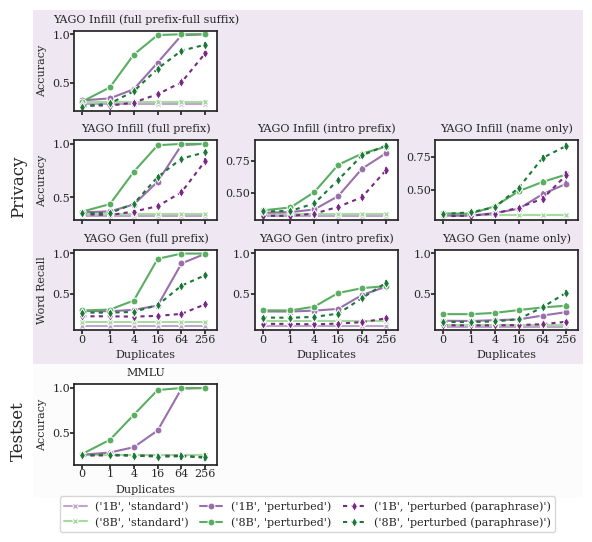

In [73]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [1, 3, 3, 1]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (privacy_results, "yago_hubble_full_prefix_full_suffix", "YAGO Infill (full prefix-full suffix)", 0, 0, "100b", "acc"),
    
    (privacy_results, "yago_hubble_full_prefix_no_suffix", "YAGO Infill (full prefix)", 1, 0, "100b", "acc"),
    (privacy_results, "yago_hubble_intro_prefix_no_suffix", "YAGO Infill (intro prefix)", 1, 1, "100b", "acc"),
    (privacy_results, "yago_hubble_name_only_prefix_no_suffix", "YAGO Infill (name only)", 1, 2, "100b", "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen (full prefix)", 2, 0, "100b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 2, 1, "100b", "squad_recall"),
    (privacy_results, "yago_hubble_name_only_prefix_gen", "YAGO Gen (name only)", 2, 2, "100b", "squad_recall"),
    
    (testset_results, "mmlu_hubble", "MMLU", 3, 0, "100b", "acc"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-standard-hf',
    'allegrolab__hubble-8b-100b_toks-perturbed-hf',
    # Paraphrase
    'allegrolab__hubble-1b-100b_toks-paraphrased-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-paraphrased-perturbed-hf',
]
line_styles = {
    ('1B', 'standard'): (),
    ('1B', 'perturbed'): (),
    ('1B', 'perturbed (paraphrase)'): (2, 2),
    ('8B', 'standard'): (),
    ('8B', 'perturbed'): (),
    ('8B', 'perturbed (paraphrase)'): (2, 2),
}

hue_colors = {
    ('1B', 'standard'): "#c2a5cf",
    ('1B', 'perturbed'): "#9970ab",
    ('1B', 'perturbed (paraphrase)'): "#762a83",
    ('8B', 'standard'): "#a6dba0",
    ('8B', 'perturbed'): "#5aae61",
    ('8B', 'perturbed (paraphrase)'): "#1b7837",
}
hue_markers = {
    ('1B', 'standard'): "X",
    ('1B', 'perturbed'): "o",
    ('1B', 'perturbed (paraphrase)'): "d",
    ('8B', 'standard'): "X",
    ('8B', 'perturbed'): "o",
    ('8B', 'perturbed (paraphrase)'): "d",
}

def _get_scale_tag(m_nm):
    if '1b' in m_nm:
        return '1B'
    if '8b' in m_nm:
        return '8B'
    raise ValueError(f'Unsupported model name: {m_nm}')

def _get_corpus_tag(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'paraphrased' in m_nm:
        return 'perturbed (paraphrase)'
    if 'perturbed' in m_nm and 'paraphrase' not in m_nm:
        return 'perturbed'
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: (_get_scale_tag(n_), _get_corpus_tag(n_)))
    
    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby('Corpus Type')[metric].mean(), temp_df_st.groupby('Corpus Type')[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby('Corpus Type')[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()
    display(task)
    display(temp_df_pt.groupby(['Corpus Type', 'duplicates'])[metric].mean())
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=hue_markers,
        markersize=5,
        linewidth=1.5,
        hue_order=[('1B', 'standard'), ('8B', 'standard'), ('1B', 'perturbed'), ('8B', 'perturbed'),
                   ('1B', 'perturbed (paraphrase)'), ('8B', 'perturbed (paraphrase)')],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)
    if r in {2, 3} and c > 0:
        ax.sharey(axes[r][0])
    
    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=3,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.08),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    if r not in {3, 2}:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")
        
    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 3, "Privacy"),
    (3, 4, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])
print(y_offsets)
    
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [0.0, (y_offsets[0][0] + y_offsets[1][1])/2],
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start//2]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/paraphrase-full.pdf", format="pdf", bbox_inches="tight")

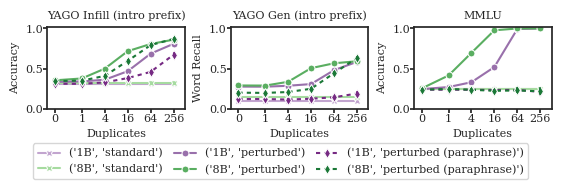

In [74]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

fig = plt.figure(figsize=(5.5, 5.5 / 4), layout="constrained")
gs = gridspec.GridSpec(1, 3, figure=fig)

cols_per_row=[3]
axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (privacy_results, "yago_hubble_intro_prefix_no_suffix", "YAGO Infill (intro prefix)", 0, 0, "100b", "acc"),
    
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 0, 1, "100b", "squad_recall"),
    
    (testset_results, "mmlu_hubble", "MMLU", 0, 2, "100b", "acc"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-standard-hf',
    'allegrolab__hubble-8b-100b_toks-perturbed-hf',
    # Paraphrase
    'allegrolab__hubble-1b-100b_toks-paraphrased-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-paraphrased-perturbed-hf',
]
line_styles = {
    ('1B', 'standard'): (),
    ('1B', 'perturbed'): (),
    ('1B', 'perturbed (paraphrase)'): (2, 2),
    ('8B', 'standard'): (),
    ('8B', 'perturbed'): (),
    ('8B', 'perturbed (paraphrase)'): (2, 2),
}

hue_colors = {
    ('1B', 'standard'): "#c2a5cf",
    ('1B', 'perturbed'): "#9970ab",
    ('1B', 'perturbed (paraphrase)'): "#762a83",
    ('8B', 'standard'): "#a6dba0",
    ('8B', 'perturbed'): "#5aae61",
    ('8B', 'perturbed (paraphrase)'): "#1b7837",
}
hue_markers = {
    ('1B', 'standard'): "X",
    ('1B', 'perturbed'): "o",
    ('1B', 'perturbed (paraphrase)'): "d",
    ('8B', 'standard'): "X",
    ('8B', 'perturbed'): "o",
    ('8B', 'perturbed (paraphrase)'): "d",
}

def _get_scale_tag(m_nm):
    if '1b' in m_nm:
        return '1B'
    if '8b' in m_nm:
        return '8B'
    raise ValueError(f'Unsupported model name: {m_nm}')

def _get_corpus_tag(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'paraphrased' in m_nm:
        return 'perturbed (paraphrase)'
    if 'perturbed' in m_nm and 'paraphrase' not in m_nm:
        return 'perturbed'
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: (_get_scale_tag(n_), _get_corpus_tag(n_)))

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby('Corpus Type')[metric].mean(), temp_df_st.groupby('Corpus Type')[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby('Corpus Type')[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=hue_markers,
        markersize=5,
        linewidth=1.5,
        hue_order=[('1B', 'standard'), ('8B', 'standard'), ('1B', 'perturbed'), ('8B', 'perturbed'),
                   ('1B', 'perturbed (paraphrase)'), ('8B', 'perturbed (paraphrase)')],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)
    ax.set_ylim(0, 1.02)
    
    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=3,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.3),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
    ax.set_xlabel("Duplicates")

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5)

# plt.show()
plt.savefig("figures/paraphrase-main.pdf", format="pdf", bbox_inches="tight")

#### Architecture

[[np.float64(0.6838514646464644), np.float64(0.9943177272727274)], [np.float64(0.36159452020202015), np.float64(0.6724869191919188)], [np.float64(0.005682272727272722), np.float64(0.3502299747474748)]]
[[np.float64(0.6781691919191917), 1.0], [np.float64(0.3559122474747475), np.float64(0.6781691919191917)], [0.0, np.float64(0.3559122474747475)]]


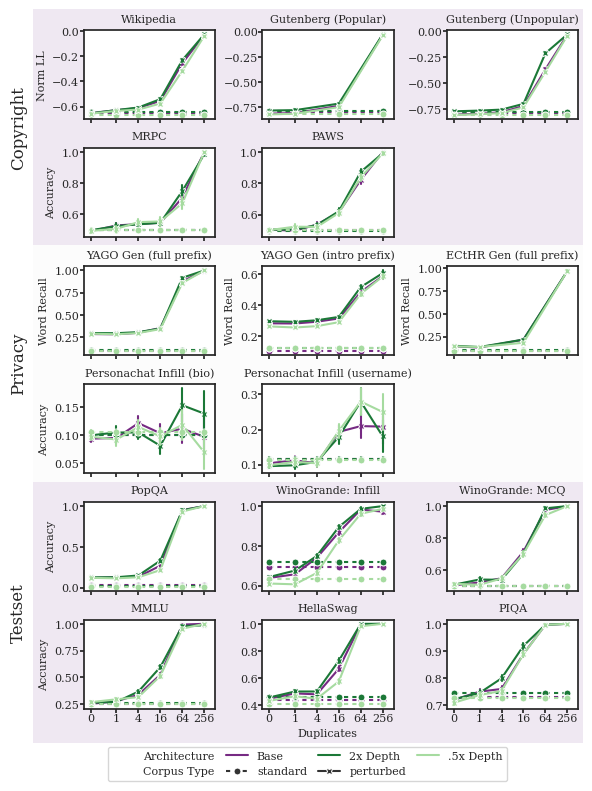

In [75]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [3, 2, 3, 2, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg (Popular)", 0, 1, "100b", "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 2, "100b", "byte_perplexity"),

    (copyright_results, "mrpc_hubble", "MRPC", 1, 0, "100b", "acc"),
    (copyright_results, "paws_hubble", "PAWS", 1, 1, "100b", "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "YAGO Gen (full prefix)", 2, 0, "100b", "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 2, 1, "100b", "squad_recall"),
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen (full prefix)", 2, 2, "100b", "squad_recall"),
    # (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR: gen", 2, 3, "8b", "squad_recall"),

    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat Infill (bio)", 3, 0, "100b", "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat Infill (username)", 3, 1, "100b", "acc"),

    (testset_results, "popqa_hubble", "PopQA", 4, 0, "100b", "exact_match"),
    (testset_results, "winogrande_hubble_infill", "WinoGrande: Infill", 4, 1, "100b", "acc"),
    (testset_results, "winogrande_hubble_mcq", "WinoGrande: MCQ", 4, 2, "100b", "acc"),
    
    (testset_results, "mmlu_hubble", "MMLU", 5, 0, "100b", "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 5, 1, "100b", "acc"),
    (testset_results, "piqa_hubble", "PIQA", 5, 2, "100b", "acc"),
    # (testset_results, "ellie_hubble", "Ellie", 5, 2, "8b", "perplexity"),
    # (testset_results, "munch_hubble", "Munch", 5, 3, "8b", "perplexity"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # Architecture
    'allegrolab__hubble-1b-100b_toks-half_depth-standard-hf',
    'allegrolab__hubble-1b-100b_toks-half_depth-perturbed-hf',
    'allegrolab__hubble-1b-100b_toks-double_depth-standard-hf',
    'allegrolab__hubble-1b-100b_toks-double_depth-perturbed-hf',
]

line_styles = {
    'standard': (2, 2),
    'perturbed': (),
}

hue_colors = {
    'Base': "#762a83",
    '2x Depth': "#1b7837",
    '.5x Depth': "#a6dba0",
}

style_markers = {
    'standard': "o",
    'perturbed': "X",
}

def _get_achitecture_type(m_nm):
    if 'double_depth' in m_nm:
        return "2x Depth"
    if 'half_depth' in m_nm:
        return ".5x Depth"
    return "Base"

def _get_corpus_type(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'perturbed' in m_nm:
        return 'perturbed'
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: _get_corpus_type(n_))
    temp_df['Architecture'] = temp_df['model'].apply(lambda n_: _get_achitecture_type(n_))

    temp_df_st = temp_df.loc[temp_df['Corpus Type'] == 'standard'].copy()
    st_mean, st_se = temp_df_st.groupby('Architecture')[metric].mean(), temp_df_st.groupby('Architecture')[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby('Architecture')[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby(["duplicates", "Architecture"])[metric].sem()}")

    temp_df_pt = temp_df.loc[temp_df['Corpus Type'] != 'standard'].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Architecture",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=style_markers,
        markersize=5,
        linewidth=1.5,
        hue_order=["Base", "2x Depth", ".5x Depth"],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles = tuple(handles[i_x] for i_x in [0, 4, 1, 5, 2, 6, 3])
        labels = tuple(labels[i_x] for i_x in [0, 4, 1, 5, 2, 6, 3])

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=4,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.06),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0 or r == 2:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        if c==1:
            ax.set_xlabel("Duplicates")
        else:
            ax.set_xlabel("")

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5) 

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

groups = [
    (0, 2, "Copyright"),
    (2, 4, "Privacy"),
    (4, 6, "Testset")
]
colors = ["#c2a5cf", "#f7f7f7", "#c2a5cf"]

# First gather the offsets
y_offsets = []
for (start, end, label), color in zip(groups, colors):
    # collect axes in this group
    group_axes = [ax for r in range(start, end) for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])

print(y_offsets)   
fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
                 [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
                 [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
                ]
print(fixed_offsets)

for (start, end, label), color in zip(groups, colors):
    y0, y1 = fixed_offsets[start//2]
    h = y1 - y0
    
    # rectangle *above* the axes.patch but below lines/text (lines default zorder=2)
    rect = patches.Rectangle(
        (0, y0), 1, h,
        transform=fig.transFigure,
        facecolor=color,
        alpha=0.25,
        zorder=0,     # above axes.patch (zorder 0), below typical line artists (zorder 2)
        linewidth=0
    )
    fig.add_artist(rect)

    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, label,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.show()
plt.savefig("figures/architecture-full.pdf", format="pdf", bbox_inches="tight")

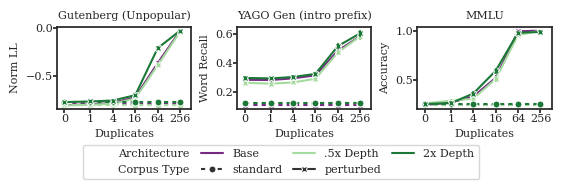

In [76]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

fig = plt.figure(figsize=(5.5, 5.5 / 4), layout="constrained")
gs = gridspec.GridSpec(1, 3, figure=fig)

cols_per_row=[3]
axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Accuracy",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg (Unpopular)", 0, 0, "100b", "byte_perplexity"),
    
    (privacy_results, "yago_hubble_intro_prefix_gen", "YAGO Gen (intro prefix)", 0, 1, "100b", "squad_recall"),
    
    (testset_results, "mmlu_hubble", "MMLU", 0, 2, "100b", "acc"),
]

model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    # Architecture
    'allegrolab__hubble-1b-100b_toks-half_depth-standard-hf',
    'allegrolab__hubble-1b-100b_toks-half_depth-perturbed-hf',
    'allegrolab__hubble-1b-100b_toks-double_depth-standard-hf',
    'allegrolab__hubble-1b-100b_toks-double_depth-perturbed-hf',
]

line_styles = {
    'standard': (2, 2),
    'perturbed': (),
}

hue_colors = {
    'Base': "#762a83",
    '2x Depth': "#1b7837",
    '.5x Depth': "#a6dba0",
}

style_markers = {
    'standard': "o",
    'perturbed': "X",
}

def _get_achitecture_type(m_nm):
    if 'double_depth' in m_nm:
        return "2x Depth"
    if 'half_depth' in m_nm:
        return ".5x Depth"
    return "Base"

def _get_corpus_type(m_nm):
    if 'standard' in m_nm:
        return 'standard'
    if 'perturbed' in m_nm:
        return 'perturbed'
    raise ValueError(f'Unsupported model name: {m_nm}')

# --- plotting loop (same as before) ---
for results, task, title, r, c, corpus_size, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[(df.model.str.contains(corpus_size)) & (df.model.apply(lambda m_: m_ in model_subset))].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(lambda n_: _get_corpus_type(n_))
    temp_df['Architecture'] = temp_df['model'].apply(lambda n_: _get_achitecture_type(n_))

    temp_df_st = temp_df.loc[temp_df['Corpus Type'] == 'standard'].copy()
    st_mean, st_se = temp_df_st.groupby('Architecture')[metric].mean(), temp_df_st.groupby('Architecture')[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby('Architecture')[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby(["duplicates", "Architecture"])[metric].sem()}")

    temp_df_pt = temp_df.loc[temp_df['Corpus Type'] != 'standard'].copy()
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Architecture",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=style_markers,
        markersize=5,
        linewidth=1.5,
        # hue_order=['1B', '8B'],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles = tuple(handles[i_x] for i_x in [0, 4, 1, 5, 2, 6, 3])
        labels = tuple(labels[i_x] for i_x in [0, 4, 1, 5, 2, 6, 3])
        
        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=4,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.3),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
    ax.set_xlabel("Duplicates")

    # ax.tick_params(
    #     axis="both",      # apply to both x and y
    #     which="both",     # both major and minor ticks
    #     direction="out",# tick direction ('in', 'out', 'inout')
    #     length=4,         # tick length
    #     width=1,          # tick width
    #     bottom=True,
    # )

# for ax_row in axes:
#     for ax in ax_row:
#         ax.set_title(ax.get_title(), pad=5)

# plt.show()
plt.savefig("figures/architecture-main.pdf", format="pdf", bbox_inches="tight")

# Domain Specific Plots

In [94]:
sns.set_theme(style="ticks")

In [95]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["legend.title_fontsize"] = SMALL_SIZE

plt.rcParams["font.family"] = "serif"

In [96]:
model_subset = [
    'allegrolab__hubble-1b-100b_toks-standard-hf',
    'allegrolab__hubble-1b-100b_toks-perturbed-hf',
    'allegrolab__hubble-1b-500b_toks-standard-hf',
    'allegrolab__hubble-1b-500b_toks-perturbed-hf',
    'allegrolab__hubble-8b-100b_toks-standard-hf',
    'allegrolab__hubble-8b-100b_toks-perturbed-hf',
    'allegrolab__hubble-8b-500b_toks-standard-hf',
    'allegrolab__hubble-8b-500b_toks-perturbed-hf',
]

### Copyright - Passages

In [158]:
copyright_tasks = [
    "wikipedia_hubble",
    "wikipedia_hubble_verbatim_p50",
    "gutenberg_unpopular_hubble",
    "gutenberg_unpopular_hubble_verbatim_p50",
    "gutenberg_popular_hubble",
    "gutenberg_popular_hubble_verbatim_p50",
]

In [159]:
from rouge_score import rouge_scorer
from transformers import AutoTokenizer

In [160]:
ROUGE_SCORER = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=False)

In [161]:
tokenizer = AutoTokenizer.from_pretrained("allegrolab/hubble-1b-100b_toks-perturbed-hf")

In [162]:
def load_and_add_verbatim_metric(path, prefix_len=50, suffix_len=100):
    fh = open(get_newest_file(path),'rt')
    data = [ json.loads(line) for line in fh ]
    if 'verbatim' not in path or f'exact_match_tokens_s{suffix_len}' in data[0]['metrics']:
        return data
    for one_dp in data:
        target_prefix = tokenizer(one_dp['doc']['text'])['input_ids'][prefix_len:prefix_len+suffix_len]
        if '_popular' in path and len(target_prefix) < suffix_len:
            import pdb; pdb.set_trace()
        
        model_resp = one_dp['filtered_resps'][0]
        model_resp_prefix = tokenizer(model_resp)['input_ids'][:min(suffix_len, len(target_prefix))]
        
        metric_val = float(target_prefix == model_resp_prefix)
        one_dp['metrics'].append(f'exact_match_tokens_s{suffix_len}')
        one_dp[f'exact_match_tokens_s{suffix_len}'] = metric_val

        metric_val = ROUGE_SCORER.score(tokenizer.decode(target_prefix).strip(), tokenizer.decode(model_resp_prefix).strip())
        one_dp['metrics'].append(f'rougeL_f1_s{suffix_len}')
        one_dp[f'rougeL_f1_s{suffix_len}'] = metric_val["rougeL"].fmeasure
        one_dp['metrics'].append(f'rougeL_recall_s{suffix_len}')
        one_dp[f'rougeL_recall_s{suffix_len}'] = metric_val["rougeL"].recall
        one_dp['metrics'].append(f'rougeL_precision_s{suffix_len}')
        one_dp[f'rougeL_precision_s{suffix_len}'] = metric_val["rougeL"].precision
    return data

In [ ]:
copyright_results = {}
for task in copyright_tasks:
    dfs = []
    metric_list = None
    for model in model_subset:
        print(model, task)
        path = f'/shared/hubble-eval-results/copyright/{model}/samples_{task}_2025*'
        data = load_and_add_verbatim_metric(path)

        if metric_list is None:
            metric_list = data[0]['metrics']
            print(f">> {task}: {metric_list}")

        df = []
        columns = ['model', 'duplicates'] + metric_list
        for i in data:
            row = []
            row.append(model)
            meta = json.loads(i['doc']['meta'])
            row.append(meta['duplicates'])
            for metric in metric_list:
                if metric == 'byte_perplexity':
                    row.append(i[metric][0] / i[metric][1])
                else:
                    row.append(i[metric])
            df.append(row)
        df = pd.DataFrame(df, columns=columns)
        dfs.append(df)
    copyright_results[task] = pd.concat(dfs, axis=0)

allegrolab__hubble-1b-100b_toks-standard-hf wikipedia_hubble
>> wikipedia_hubble: ['word_perplexity', 'byte_perplexity']
allegrolab__hubble-1b-100b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-1b-500b_toks-standard-hf wikipedia_hubble
allegrolab__hubble-1b-500b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-8b-100b_toks-standard-hf wikipedia_hubble
allegrolab__hubble-8b-100b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-8b-500b_toks-standard-hf wikipedia_hubble
allegrolab__hubble-8b-500b_toks-perturbed-hf wikipedia_hubble
allegrolab__hubble-1b-100b_toks-standard-hf wikipedia_hubble_verbatim_p50
>> wikipedia_hubble_verbatim_p50: ['rougeL_f1', 'rougeL_precision', 'rougeL_recall', 'rougeL_f1_stemmed', 'rougeL_precision_stemmed', 'rougeL_recall_stemmed', 'exact_match_tokens', 'exact_match_tokens_s100', 'rougeL_f1_s100', 'rougeL_recall_s100', 'rougeL_precision_s100']
allegrolab__hubble-1b-100b_toks-perturbed-hf wikipedia_hubble_verbatim_p50
allegrolab__hubble-1b-500b

fig height: 3.666666666666667
[DEBUG] wikipedia_hubble: mean: Corpus Type        duplicates
1B-100B-perturbed  1            -0.652008
                   4            -0.628013
                   16           -0.611787
                   64           -0.553778
                   256          -0.256909
                   1024         -0.031490
1B-500B-perturbed  1            -0.627612
                   4            -0.618548
                   16           -0.618454
                   64           -0.604291
                   256          -0.546234
                   1024         -0.268507
8B-100B-perturbed  1            -0.622023
                   4            -0.544060
                   16           -0.432403
                   64           -0.187764
                   256          -0.027439
                   1024         -0.015164
8B-500B-perturbed  1            -0.562537
                   4            -0.540728
                   16           -0.526279
                   64     

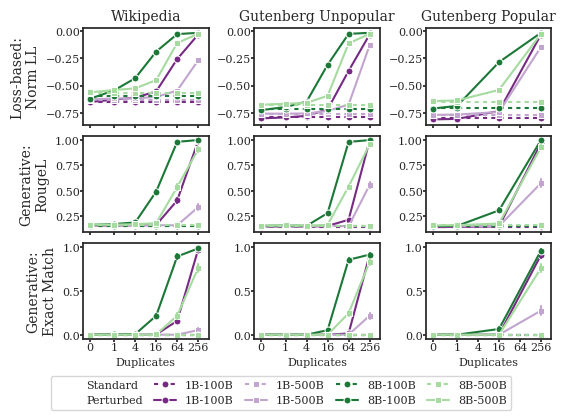

In [164]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

# with sns.axes_style("whitegrid"):
cols_per_row = [3, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Acc",
    "acc_norm": "Norm Acc",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
    "rougeL_recall_s100": "RougeL Recall",
    "exact_match_tokens_s100": "Exact Match",
}

tasks = [
    (copyright_results, "wikipedia_hubble", "Wikipedia", 0, 0, "byte_perplexity"),
    (copyright_results, "gutenberg_unpopular_hubble", "Gutenberg Unpopular", 0, 1, "byte_perplexity"),
    (copyright_results, "gutenberg_popular_hubble", "Gutenberg Popular", 0, 2, "byte_perplexity"),
    
    (copyright_results, "wikipedia_hubble_verbatim_p50", "Wikipedia", 1, 0, "rougeL_f1_s100"),
    (copyright_results, "gutenberg_unpopular_hubble_verbatim_p50", "Gutenberg Unpopular", 1, 1, "rougeL_f1_s100"),
    (copyright_results, "gutenberg_popular_hubble_verbatim_p50", "Gutenberg Popular", 1, 2, "rougeL_f1_s100"),

    
    (copyright_results, "wikipedia_hubble_verbatim_p50", "Wikipedia", 2, 0, "exact_match_tokens_s100"),
    (copyright_results, "gutenberg_unpopular_hubble_verbatim_p50", "Gutenberg Unpopular", 2, 1, "exact_match_tokens_s100"),
    (copyright_results, "gutenberg_popular_hubble_verbatim_p50", "Gutenberg Popular", 2, 2, "exact_match_tokens_s100"),
]

line_styles = {
    '8B-500B-standard': (2, 2),
    '8B-500B-perturbed': (),
    '8B-100B-standard': (2, 2),
    '8B-100B-perturbed': (),
    '1B-500B-standard': (2, 2),
    '1B-500B-perturbed': (),
    '1B-100B-standard': (2, 2),
    '1B-100B-perturbed': (),
}
marker_styles = {
    '8B-500B-standard': "s",
    '8B-500B-perturbed': "s",
    '8B-100B-standard': "o",
    '8B-100B-perturbed': "o",
    '1B-500B-standard': "s",
    '1B-500B-perturbed': "s",
    '1B-100B-standard': "o",
    '1B-100B-perturbed': "o",
}
hue_colors = {
    '8B-500B-standard': "#a6dba0",
    '8B-500B-perturbed': "#a6dba0",
    '8B-100B-standard': "#1b7837",
    '8B-100B-perturbed': "#1b7837",
    '1B-500B-standard': "#c2a5cf",
    '1B-500B-perturbed': "#c2a5cf",
    '1B-100B-standard': "#762a83",
    '1B-100B-perturbed': "#762a83",
}

def _get_run_tags(m_nm):
    tags = ('1B' if '1b' in m_nm else '8B', '100B' if '100b' in m_nm else '500B', 'standard' if 'standard' in m_nm else 'perturbed')
    return f"{tags[0]}-{tags[1]}-{tags[2]}"

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new se: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    print(f"[DEBUG] {task}: mean: {temp_df_pt.groupby(["Corpus Type", "duplicates"])[metric].mean()}")
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        # err_kws={"elinewidth": 1},
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    if r == 0:
        ax.set_title(title, fontsize=MEDIUM_SIZE)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)
    
    if c > 0:
        ax.sharey(axes[r][0])
        axes[r][0].autoscale(axis='y')

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")
        
        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.12),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=2)
    ax.set_ylabel("")
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

axes[0][0].set_ylabel("Loss-based:\nNorm LL", fontsize=MEDIUM_SIZE)
axes[1][0].set_ylabel("Generative:\nRougeL", fontsize=MEDIUM_SIZE)
axes[2][0].set_ylabel("Generative:\nExact Match", fontsize=MEDIUM_SIZE)

plt.savefig("figures/domain-specific/copyright-passages.pdf", format="pdf", bbox_inches="tight")

### Copyright - Paraphrases

In [78]:
copyright_tasks = [
    "paws_hubble",
    "mrpc_hubble",
]

In [ ]:
copyright_results = {}
for task in copyright_tasks:
    dfs = []
    metric_list = None
    for model in model_subset:
        print(model, task)
        path = f'/shared/hubble-eval-results/copyright/{model}/samples_{task}_2025*'
        fh = open(get_newest_file(path),'rt')
        data = [ json.loads(line) for line in fh ]

        if metric_list is None:
            metric_list = data[0]['metrics']
            print(f">> {task}: {metric_list}")

        df = []
        columns = ['model', 'duplicates'] + metric_list
        for i in data:
            row = []
            row.append(model)
            meta = json.loads(i['doc']['meta'])
            row.append(meta['duplicates'])
            for metric in metric_list:
                if metric == 'byte_perplexity':
                    row.append(i[metric][0] / i[metric][1])
                else:
                    row.append(i[metric])
            df.append(row)
        df = pd.DataFrame(df, columns=columns)
        dfs.append(df)
    copyright_results[task] = pd.concat(dfs, axis=0)

allegrolab__hubble-1b-100b_toks-standard-hf paws_hubble
>> paws_hubble: ['acc', 'acc_norm']
allegrolab__hubble-1b-100b_toks-perturbed-hf paws_hubble
allegrolab__hubble-1b-500b_toks-standard-hf paws_hubble
allegrolab__hubble-1b-500b_toks-perturbed-hf paws_hubble
allegrolab__hubble-8b-100b_toks-standard-hf paws_hubble
allegrolab__hubble-8b-100b_toks-perturbed-hf paws_hubble
allegrolab__hubble-8b-500b_toks-standard-hf paws_hubble
allegrolab__hubble-8b-500b_toks-perturbed-hf paws_hubble
allegrolab__hubble-1b-100b_toks-standard-hf mrpc_hubble
>> mrpc_hubble: ['acc', 'acc_norm']
allegrolab__hubble-1b-100b_toks-perturbed-hf mrpc_hubble
allegrolab__hubble-1b-500b_toks-standard-hf mrpc_hubble
allegrolab__hubble-1b-500b_toks-perturbed-hf mrpc_hubble
allegrolab__hubble-8b-100b_toks-standard-hf mrpc_hubble
allegrolab__hubble-8b-100b_toks-perturbed-hf mrpc_hubble
allegrolab__hubble-8b-500b_toks-standard-hf mrpc_hubble
allegrolab__hubble-8b-500b_toks-perturbed-hf mrpc_hubble


fig height: 2.4444444444444446


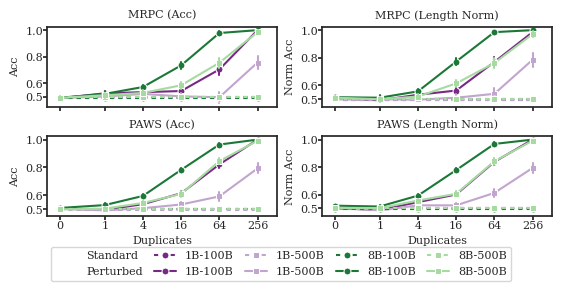

In [156]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

cols_per_row = [2, 2]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = max_cols // ncols  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Acc",
    "acc_norm": "Norm Acc",
    "exact_match": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
}

tasks = [
    (copyright_results, "mrpc_hubble", "MRPC (Acc)", 0, 0, "acc"),
    (copyright_results, "mrpc_hubble", "MRPC (Length Norm)", 0, 1, "acc_norm"),
    
    (copyright_results, "paws_hubble", "PAWS (Acc)", 1, 0, "acc"),
    (copyright_results, "paws_hubble", "PAWS (Length Norm)", 1, 1, "acc_norm"),
]

line_styles = {
    '8B-500B-standard': (2, 2),
    '8B-500B-perturbed': (),
    '8B-100B-standard': (2, 2),
    '8B-100B-perturbed': (),
    '1B-500B-standard': (2, 2),
    '1B-500B-perturbed': (),
    '1B-100B-standard': (2, 2),
    '1B-100B-perturbed': (),
}
marker_styles = {
    '8B-500B-standard': "s",
    '8B-500B-perturbed': "s",
    '8B-100B-standard': "o",
    '8B-100B-perturbed': "o",
    '1B-500B-standard': "s",
    '1B-500B-perturbed': "s",
    '1B-100B-standard': "o",
    '1B-100B-perturbed': "o",
}
hue_colors = {
    '8B-500B-standard': "#a6dba0",
    '8B-500B-perturbed': "#a6dba0",
    '8B-100B-standard': "#1b7837",
    '8B-100B-perturbed': "#1b7837",
    '1B-500B-standard': "#c2a5cf",
    '1B-500B-perturbed': "#c2a5cf",
    '1B-100B-standard': "#762a83",
    '1B-100B-perturbed': "#762a83",
}

def _get_run_tags(m_nm):
    tags = ('1B' if '1b' in m_nm else '8B', '100B' if '100b' in m_nm else '500B', 'standard' if 'standard' in m_nm else 'perturbed')
    return f"{tags[0]}-{tags[1]}-{tags[2]}"

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)
    # ax.set_ylim(0.4, 1.05)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")
        
        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5, #adjust depending on ow many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.15),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()
    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    ax.set_yticks([0.5, 0.6, 0.8, 1.0], [0.5, 0.6, 0.8, 1.0])
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

plt.savefig("figures/domain-specific/copyright-paraphrases.pdf", format="pdf", bbox_inches="tight")

### Testset

In [81]:
testset_tasks = [
    "popqa_hubble",
    "winogrande_hubble_infill",
    "winogrande_hubble_infill_on_mcq",
    "winogrande_hubble_mcq",
    "winogrande_hubble_mcq_on_infill",
    "hellaswag_hubble",
    "mmlu_hubble",
    "piqa_hubble",
    "ellie_hubble",
    "ellie_hubble_gen",
    "munch_hubble",
    "munch_hubble_ppl",
]

In [82]:
def count_bytes(doc_str) -> int:
    return len(doc_str.encode("utf-8"))

In [ ]:
testset_results = {}
for task in testset_tasks:
    dfs = []
    paired_dfs = []
    metric_list = None
    for model in model_subset:
        print(model, task)
        path = f'/shared/hubble-eval-results/testset/{model}/samples_{task}_2025*'
        fh = open(get_newest_file(path),'rt')
        data = [ json.loads(line) for line in fh ]

        if metric_list is None:
            metric_list = data[0]['metrics']
            print(f">> {task}: {metric_list}")

        df = []
        columns = ['model', 'duplicates'] + metric_list
        for i in data:
            row = []
            row.append(model)
            row.append(i['doc']['duplicates'])
            for metric in metric_list:
                if metric == 'byte_perplexity':
                    row.append(i[metric][0] / i[metric][1])
                elif metric == 'perplexity':
                    row.append(i[metric]/count_bytes(i['target']))
                else:
                    row.append(i[metric])
            df.append(row)
        df = pd.DataFrame(df, columns=columns)

        # skip minimal pairs for winogrande
        if 'winogrande_hubble' in task:
            df0 = df[::2]
            df1 = df[1::2].copy()
            assert (df1['duplicates']==0).all()
            df1['duplicates'] = df0['duplicates'].tolist()
            # print(df0.head())
            # print(df1.head())
            assert len(df0) == len(df1)
            dfs.append(df0)
            paired_dfs.append(df1)
        else:
            dfs.append(df)
    testset_results[task] = pd.concat(dfs, axis=0)
    if paired_dfs:
        testset_results[task+"_paired"] = pd.concat(paired_dfs, axis=0)
        print(f"\n>> Adding paired task: {task+'_paired'} (len = {len(testset_results[task+'_paired'])}) [orig preds len: {len(testset_results[task])}]\n")

allegrolab__hubble-1b-100b_toks-standard-hf popqa_hubble
>> popqa_hubble: ['exact_match', 'squad_f1', 'squad_recall', 'prefix_match']
allegrolab__hubble-1b-100b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-1b-500b_toks-standard-hf popqa_hubble
allegrolab__hubble-1b-500b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-8b-100b_toks-standard-hf popqa_hubble
allegrolab__hubble-8b-100b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-8b-500b_toks-standard-hf popqa_hubble
allegrolab__hubble-8b-500b_toks-perturbed-hf popqa_hubble
allegrolab__hubble-1b-100b_toks-standard-hf winogrande_hubble_infill
>> winogrande_hubble_infill: ['acc', 'acc_norm', 'acc_mutual_info']
allegrolab__hubble-1b-100b_toks-perturbed-hf winogrande_hubble_infill
allegrolab__hubble-1b-500b_toks-standard-hf winogrande_hubble_infill
allegrolab__hubble-1b-500b_toks-perturbed-hf winogrande_hubble_infill
allegrolab__hubble-8b-100b_toks-standard-hf winogrande_hubble_infill
allegrolab__hubble-8b-100b_toks-perturbed-hf win

In [84]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

In [89]:
line_styles = {
    '8B-500B-standard': (2, 2),
    '8B-500B-perturbed': (),
    '8B-100B-standard': (2, 2),
    '8B-100B-perturbed': (),
    '1B-500B-standard': (2, 2),
    '1B-500B-perturbed': (),
    '1B-100B-standard': (2, 2),
    '1B-100B-perturbed': (),
}
marker_styles = {
    '8B-500B-standard': "s",
    '8B-500B-perturbed': "s",
    '8B-100B-standard': "o",
    '8B-100B-perturbed': "o",
    '1B-500B-standard': "s",
    '1B-500B-perturbed': "s",
    '1B-100B-standard': "o",
    '1B-100B-perturbed': "o",
}
hue_colors = {
    '8B-500B-standard': "#a6dba0",
    '8B-500B-perturbed': "#a6dba0",
    '8B-100B-standard': "#1b7837",
    '8B-100B-perturbed': "#1b7837",
    '1B-500B-standard': "#c2a5cf",
    '1B-500B-perturbed': "#c2a5cf",
    '1B-100B-standard': "#762a83",
    '1B-100B-perturbed': "#762a83",
}

def _get_run_tags(m_nm):
    tags = ('1B' if '1b' in m_nm else '8B', '100B' if '100b' in m_nm else '500B', 'standard' if 'standard' in m_nm else 'perturbed')
    return f"{tags[0]}-{tags[1]}-{tags[2]}"

fig height: 13.75


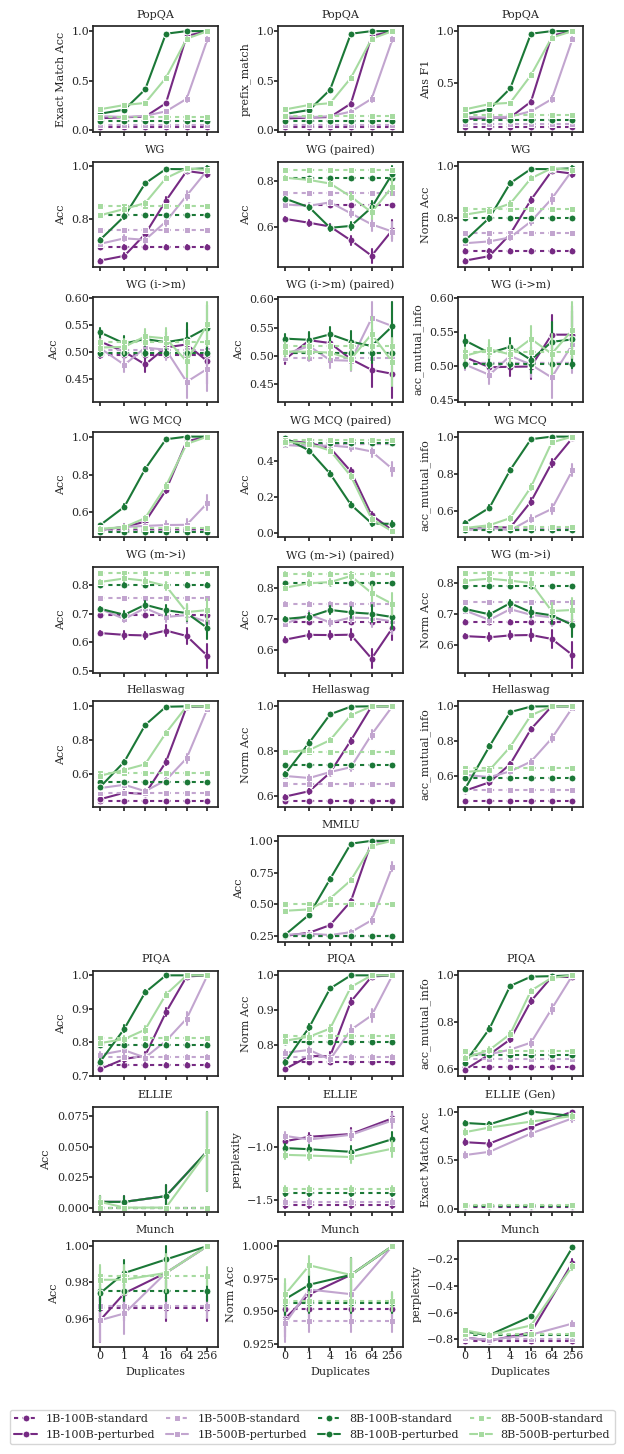

In [92]:
cols_per_row = [3, 3, 3, 3, 3, 3, 1, 3, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = (max_cols - span * ncols) // 2  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "acc": "Acc",
    "acc_norm": "Norm Acc",
    "exact_match": "Exact Match Acc",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "Ans F1",
}

tasks = [
    (testset_results, "popqa_hubble", "PopQA", 0, 0, "exact_match"),
    (testset_results, "popqa_hubble", "PopQA", 0, 1, "prefix_match"),
    (testset_results, "popqa_hubble", "PopQA", 0, 2, "squad_f1"),

    (testset_results, "winogrande_hubble_infill", "WG", 1, 0, "acc"),
    (testset_results, "winogrande_hubble_infill_paired", "WG (paired)", 1, 1, "acc"),
    (testset_results, "winogrande_hubble_infill", "WG", 1, 2, "acc_norm"),

    (testset_results, "winogrande_hubble_mcq_on_infill", "WG (i->m)", 2, 0, "acc"),
    (testset_results, "winogrande_hubble_mcq_on_infill_paired", "WG (i->m) (paired)", 2, 1, "acc"),
    (testset_results, "winogrande_hubble_mcq_on_infill", "WG (i->m)", 2, 2, "acc_mutual_info"),

    (testset_results, "winogrande_hubble_mcq", "WG MCQ", 3, 0, "acc"),
    (testset_results, "winogrande_hubble_mcq_paired", "WG MCQ (paired)", 3, 1, "acc"),
    (testset_results, "winogrande_hubble_mcq", "WG MCQ", 3, 2, "acc_mutual_info"),

    (testset_results, "winogrande_hubble_infill_on_mcq", "WG (m->i)", 4, 0, "acc"),
    (testset_results, "winogrande_hubble_infill_on_mcq_paired", "WG (m->i) (paired)", 4, 1, "acc"),
    (testset_results, "winogrande_hubble_infill_on_mcq", "WG (m->i)", 4, 2, "acc_norm"),
    
    (testset_results, "hellaswag_hubble", "Hellaswag", 5, 0, "acc"),
    (testset_results, "hellaswag_hubble", "Hellaswag", 5, 1, "acc_norm"),
    (testset_results, "hellaswag_hubble", "Hellaswag", 5, 2, "acc_mutual_info"),

    (testset_results, "mmlu_hubble", "MMLU", 6, 0, "acc"),

    (testset_results, "piqa_hubble", "PIQA", 7, 0, "acc"),
    (testset_results, "piqa_hubble", "PIQA", 7, 1, "acc_norm"),
    (testset_results, "piqa_hubble", "PIQA", 7, 2, "acc_mutual_info"),

    (testset_results, "ellie_hubble", "ELLIE", 8, 0, "acc"),
    (testset_results, "ellie_hubble", "ELLIE", 8, 1, "perplexity"),
    (testset_results, "ellie_hubble_gen", "ELLIE (Gen)", 8, 2, "exact_match"),

    (testset_results, "munch_hubble", "Munch", 9, 0, "acc"),
    (testset_results, "munch_hubble", "Munch", 9, 1, "acc_norm"),
    (testset_results, "munch_hubble_ppl", "Munch", 9, 2, "perplexity"),    
]

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_title(title)
    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)
    # ax.set_ylim(0.4, 1.05)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=4,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.05),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    # ax.set_yticks([0.5, 0.6, 0.8, 1.0], [0.5, 0.6, 0.8, 1.0])
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

# plt.savefig("figures/domain-specific/testset-all.pdf", format="pdf", bbox_inches="tight")

fig height: 4.888888888888889


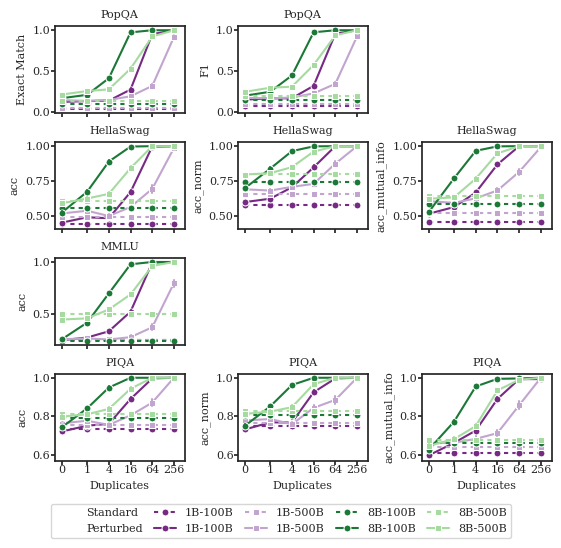

In [155]:
cols_per_row = [2, 3, 1, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "exact_match": "Exact Match",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "F1",
}

tasks = [
    (testset_results, "popqa_hubble", "PopQA", 0, 0, "exact_match"),
    (testset_results, "popqa_hubble", "PopQA", 0, 1, "squad_f1"),

    (testset_results, "hellaswag_hubble", "HellaSwag", 1, 0, "acc"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 1, 1, "acc_norm"),
    (testset_results, "hellaswag_hubble", "HellaSwag", 1, 2, "acc_mutual_info"),

    (testset_results, "mmlu_hubble", "MMLU", 2, 0, "acc"),

    (testset_results, "piqa_hubble", "PIQA", 3, 0, "acc"),
    (testset_results, "piqa_hubble", "PIQA", 3, 1, "acc_norm"),
    (testset_results, "piqa_hubble", "PIQA", 3, 2, "acc_mutual_info"),
]

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.1),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    if c > 0:
        ax.sharey(axes[r][0])
        axes[r][0].autoscale(axis='y')
    
    ax.set_title(title)
    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    # ax.set_yticks([0.5, 0.6, 0.8, 1.0], [0.5, 0.6, 0.8, 1.0])
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

plt.savefig("figures/domain-specific/testset-set1.pdf", format="pdf", bbox_inches="tight")

fig height: 4.888888888888889


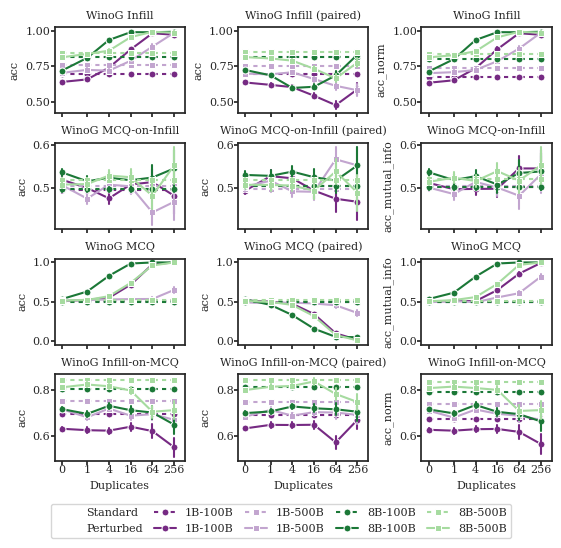

In [154]:
cols_per_row = [3, 3, 3, 3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "exact_match": "Exact Match",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "F1",
}

tasks = [
    (testset_results, "winogrande_hubble_infill", "WinoG Infill", 0, 0, "acc"),
    (testset_results, "winogrande_hubble_infill_paired", "WinoG Infill (paired)", 0, 1, "acc"),
    (testset_results, "winogrande_hubble_infill", "WinoG Infill", 0, 2, "acc_norm"),

    (testset_results, "winogrande_hubble_mcq_on_infill", "WinoG MCQ-on-Infill", 1, 0, "acc"),
    (testset_results, "winogrande_hubble_mcq_on_infill_paired", "WinoG MCQ-on-Infill (paired)", 1, 1, "acc"),
    (testset_results, "winogrande_hubble_mcq_on_infill", "WinoG MCQ-on-Infill", 1, 2, "acc_mutual_info"),

    (testset_results, "winogrande_hubble_mcq", "WinoG MCQ", 2, 0, "acc"),
    (testset_results, "winogrande_hubble_mcq_paired", "WinoG MCQ (paired)", 2, 1, "acc"),
    (testset_results, "winogrande_hubble_mcq", "WinoG MCQ", 2, 2, "acc_mutual_info"),

    (testset_results, "winogrande_hubble_infill_on_mcq", "WinoG Infill-on-MCQ", 3, 0, "acc"),
    (testset_results, "winogrande_hubble_infill_on_mcq_paired", "WinoG Infill-on-MCQ (paired)", 3, 1, "acc"),
    (testset_results, "winogrande_hubble_infill_on_mcq", "WinoG Infill-on-MCQ", 3, 2, "acc_norm"),
]

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")
        
        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.1),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    if c > 0:
        ax.sharey(axes[r][0])
        axes[r][0].autoscale(axis='y')
    
    ax.set_title(title)
    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    # ax.set_yticks([0.5, 0.6, 0.8, 1.0], [0.5, 0.6, 0.8, 1.0])
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

plt.savefig("figures/domain-specific/testset-wg.pdf", format="pdf", bbox_inches="tight")

fig height: 2.4444444444444446


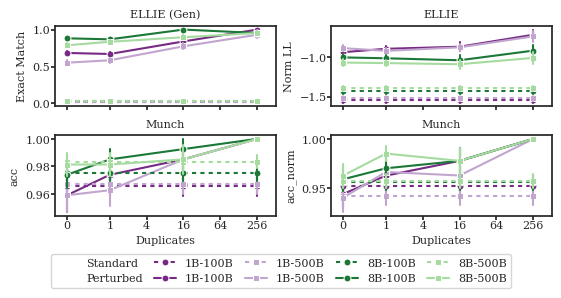

In [152]:
cols_per_row = [2, 2]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "exact_match": "Exact Match",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "F1",
    "perplexity": "Norm LL",
}

tasks = [
    (testset_results, "ellie_hubble_gen", "ELLIE (Gen)", 0, 0, "exact_match"),
    (testset_results, "ellie_hubble", "ELLIE", 0, 1, "perplexity"),
    

    (testset_results, "munch_hubble", "Munch", 1, 0, "acc"),
    (testset_results, "munch_hubble", "Munch", 1, 1, "acc_norm"),  
]

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")
        
        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.18),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    # if c > 0:
    #     ax.sharey(axes[r][0])
    #     axes[r][0].autoscale(axis='y')
    
    ax.set_title(title)
    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    # ax.set_yticks([0.5, 0.6, 0.8, 1.0], [0.5, 0.6, 0.8, 1.0])
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

plt.savefig("figures/domain-specific/testset-set2.pdf", format="pdf", bbox_inches="tight")

In [ ]:
ellie_path = f'/shared/hubble-eval-results/testset/{model_subset[1]}/samples_ellie_hubble_2025*'
ellie_df = pd.read_json(get_newest_file(ellie_path), orient='records', lines=True)
ellie_df.head()

,doc_id,doc,target,arguments,resps,filtered_resps,filter,metrics,doc_hash,prompt_hash,target_hash,perplexity,acc
0,0,{'text': 'The mother will water the plants wit...,water the plants.,{'gen_args_0': {'arg_0': 'The mother will wate...,"[[[-7.09375, False]]]","[[-7.09375, False]]",none,"[perplexity, acc]",0af1869e7a5fce281ae9e83f0a87c7420b9085495a5002...,95b4327dec0ff0ee707ed81a5d9f8c39e8b46386f462c6...,97cb7e8c886c94173cb1d0558ee821f1fce6dda0febb24...,-7.09375,0
1,1,{'text': 'The gardener cut the grass with some...,cut the grass with.,{'gen_args_0': {'arg_0': 'The gardener cut the...,"[[[-30.375, False]]]","[[-30.375, False]]",none,"[perplexity, acc]",7a42fa25e439f75e72bdbb96de5bc8b42fccf871f69408...,ddc1671887a752ebb1725e9689ceace328971ea930037b...,be31f96288d0cc37f201e9a2d4a0190dd074b588330923...,-30.37500,0
2,2,"{'text': 'The bricklayer used the knife, and t...",use the knife.,{'gen_args_0': {'arg_0': 'The bricklayer used ...,"[[[-9.0, False]]]","[[-9.0, False]]",none,"[perplexity, acc]",5daa756bccf9bdad2cafcff1385cc6a006d813ede991bc...,685fc6417ebe6f1d54c0f2663d7f22c3e463777161d40a...,544cd555d8d65055cf3e8f2e8bc71e25f8fb10fb9e7f04...,-9.00000,0
3,3,{'text': 'The student used the computer in the...,use the computer.,{'gen_args_0': {'arg_0': 'The student used the...,"[[[-9.3125, False]]]","[[-9.3125, False]]",none,"[perplexity, acc]",ac46d13aee7ba522aa9302430ff71e8705c13ce37ef87a...,c0bc81014ee14decdbc6b1f6f76a12031ca5fc91b76266...,41d3fbc9c3a196806b5a43a0aac91d96aa98c51df13bd6...,-9.31250,0
4,4,"{'text': 'The child will lend a pen, and the c...",lend a pen.,{'gen_args_0': {'arg_0': 'The child will lend ...,"[[[-14.6875, False]]]","[[-14.6875, False]]",none,"[perplexity, acc]",cbb3ac34d3d0fddd1aaab5590f2122b18020d15d081fb7...,2fbcd17a298be468a582d814c5833a146ad23519b8e572...,ebd70bfb52432533b5f975f8e8f99e1e75d7378e80840b...,-14.68750,0


In [105]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

In [106]:
ellie_df['sentence'] = ellie_df['doc'].apply(lambda d_: json.loads(d_['meta'])['Sentence'])
ellie_df['duplicates'] = ellie_df['doc'].apply(lambda d_: json.loads(d_['meta'])['duplicates'])
ellie_df.head()

,doc_id,doc,target,arguments,resps,filtered_resps,filter,metrics,doc_hash,prompt_hash,target_hash,perplexity,acc,sentence,duplicates
0,0,"{'text': 'The mother will water the plants with the bottle, the farmer will with the hose. What the farmer will do with the hose is water the plants.', 'meta': '{""Condition"": ""AT - T"", ""Sentence"": ""The mother will water the plants with the bottle, the farmer will with the hose."", ""Construction"": ""Pseudo-gapping"", ""Semantic_Role"": ""Instrument"", ""Prompt_GPT"": ""The mother will water the plants with the bottle, the farmer will with the hose. What the farmer will do with the hose is"", ""Prompt_BER...",water the plants.,"{'gen_args_0': {'arg_0': 'The mother will water the plants with the bottle, the farmer will with the hose. What the farmer will do with the hose is', 'arg_1': 'water the plants.'}}","[[[-7.09375, False]]]","[[-7.09375, False]]",none,"[perplexity, acc]",0af1869e7a5fce281ae9e83f0a87c7420b9085495a500266b0fa21117d537b04,95b4327dec0ff0ee707ed81a5d9f8c39e8b46386f462c638e77dc72d92be0c29,97cb7e8c886c94173cb1d0558ee821f1fce6dda0febb242abe0cd2b41d4af050,-7.09375,0,"The mother will water the plants with the bottle, the farmer will with the hose.",0
1,1,"{'text': 'The gardener cut the grass with someone, but she didn't know what with. What she didn't know is what the gardener cut the grass with.', 'meta': '{""Condition"": ""AT - T"", ""Sentence"": ""The gardener cut the grass with someone, but she didn\u2019t know what with."", ""Construction"": ""Sluice-Stranding"", ""Semantic_Role"": ""Instrument"", ""Prompt_GPT"": ""The gardener cut the grass with someone, but she didn't know what with. What she didn't know is what the gardener"", ""Prompt_BERT"": ""The gardene...",cut the grass with.,"{'gen_args_0': {'arg_0': 'The gardener cut the grass with someone, but she didn't know what with. What she didn't know is what the gardener', 'arg_1': 'cut the grass with.'}}","[[[-30.375, False]]]","[[-30.375, False]]",none,"[perplexity, acc]",7a42fa25e439f75e72bdbb96de5bc8b42fccf871f69408a4977238b1871d2863,ddc1671887a752ebb1725e9689ceace328971ea930037bb1994770189a99d87a,be31f96288d0cc37f201e9a2d4a0190dd074b588330923129a8eed999d44cb5a,-30.37500,0,"The gardener cut the grass with someone, but she didn’t know what with.",0
2,2,"{'text': 'The bricklayer used the knife, and the teacher did too. What the teacher did was use the knife.', 'meta': '{""Condition"": ""AT - AT"", ""Sentence"": ""The bricklayer used the knife, and the teacher did too."", ""Construction"": ""VP-ellipsis"", ""Semantic_Role"": ""Agent"", ""Prompt_GPT"": ""The bricklayer used the knife, and the teacher did too. What the teacher did was"", ""Prompt_BERT"": ""The bricklayer used the knife, and the teacher did too. What the teacher did was [MASK] the knife."", ""Verb_to_re...",use the knife.,"{'gen_args_0': {'arg_0': 'The bricklayer used the knife, and the teacher did too. What the teacher did was', 'arg_1': 'use the knife.'}}","[[[-9.0, False]]]","[[-9.0, False]]",none,"[perplexity, acc]",5daa756bccf9bdad2cafcff1385cc6a006d813ede991bcdaedab07d01fca8e0a,685fc6417ebe6f1d54c0f2663d7f22c3e463777161d40ad4acaaa7e1104b3ebb,544cd555d8d65055cf3e8f2e8bc71e25f8fb10fb9e7f04ea693a567703c11138,-9.00000,0,"The bricklayer used the knife, and the teacher did too.",0
3,3,"{'text': 'The student used the computer in the helicopter, and the professor did in the pub. What the professor did in the pub was use the computer.', 'meta': '{""Condition"": ""AT - AT"", ""Sentence"": ""The student used the computer in the helicopter, and the professor did in the pub."", ""Construction"": ""VP-ellipsis"", ""Semantic_Role"": ""Location"", ""Prompt_GPT"": ""The student used the computer in the helicopter, and the professor did in the pub. What the professor did in the pub was"", ""Prompt_BERT"": ...",use the computer.,"{'gen_args_0': {'arg_0': 'The student used the computer in the helicopter, and the professor did in the pub. What the professor did in the

### Privacy

In [97]:
privacy_tasks = [
    "yago_hubble_full_prefix_full_suffix",
    "yago_hubble_full_prefix_no_suffix",
    "yago_hubble_intro_prefix_no_suffix",
    "yago_hubble_name_only_prefix_no_suffix",
    "yago_hubble_full_prefix_gen",
    "yago_hubble_intro_prefix_gen",
    "yago_hubble_name_only_prefix_gen",
    "yago_hubble_bio_perplexity",

    "ecthr_hubble_perplexity",
    "ecthr_hubble_full_prefix_gen",
    
    "personachat_hubble_username_sp",
    "personachat_hubble_username_prompted_sp",
    "personachat_hubble_mcq",
    "personachat_hubble_prompted_mcq",
    "personachat_hubble_persona_loss",
    "personachat_hubble_ppl",
]

In [98]:
def count_bytes(doc_str) -> int:
    return len(doc_str.encode("utf-8"))

In [99]:
import re
import string
from collections import Counter
def normalize_answer(s, remove_punc=False):
    """
    Taken from the official evaluation script for v1.1 of the SQuAD dataset.
    Lower text and remove punctuation, articles and extra whitespace.
    """

    def remove_articles(text):
        return re.sub(r"\b(a|an|the)\b", " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def separate_punc_fn(text):
        exclude = set(string.punctuation)
        return "".join(ch if ch not in exclude else f' {ch} ' for ch in text)
    
    def remove_punc_fn(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    if remove_punc:
        return white_space_fix(remove_articles(remove_punc_fn(lower(s))))
    else:
        return white_space_fix(remove_articles(separate_punc_fn(lower(s))))

def prefix_match(references, predictions):
    # Exact match whether reference is an exact prefix of the prediction to account for possible over-generation from the LM
    prefix_match_list = []
    assert isinstance(references, list), "References should be a list of strings."
    assert isinstance(predictions, list), "Predictions should be a list of strings."

    for one_ref in references:
        for one_pred in predictions:
            if '@gmail' in one_ref:
                # If it's the email query
                prediction_tokens = normalize_answer(one_pred, remove_punc=False).split()
                references_tokens = normalize_answer(one_ref, remove_punc=False).split()
            else:
                prediction_tokens = normalize_answer(one_pred, remove_punc=True).split()
                references_tokens = normalize_answer(one_ref, remove_punc=True).split()
                
            is_prefix = float(references_tokens == prediction_tokens[:len(references_tokens)])
            prefix_match_list.append(is_prefix)

    return max(prefix_match_list)

def squad_recall(references, predictions):
    # Looser metric than F1 to account for possible over-generation from the LM
    recall_list = []
    assert isinstance(references, list), "References should be a list of strings."
    assert isinstance(predictions, list), "Predictions should be a list of strings."

    for one_ref in references:
        for one_pred in predictions:
            if '@gmail' in one_ref:
                # If it's the email query
                prediction_tokens = normalize_answer(one_pred, remove_punc=False).split()
                references_tokens = normalize_answer(one_ref, remove_punc=False).split()
            else:
                prediction_tokens = normalize_answer(one_pred, remove_punc=True).split()
                references_tokens = normalize_answer(one_ref, remove_punc=True).split()
            
            common = Counter(prediction_tokens) & Counter(references_tokens)
            num_same = sum(common.values())
            if num_same == 0:
                recall = 0
            else:
                recall = 1.0 * num_same / len(references_tokens)

            recall_list.append(recall)

    return max(recall_list)

In [ ]:
privacy_results = {}
for task in privacy_tasks:
    dfs = []
    paired_dfs = []
    metric_list = None
    for model in model_subset:
        print(model, task)
        path = f'/shared/hubble-eval-results/privacy/{model}/samples_{task}_2025*'
        fh = open(get_newest_file(path),'rt')
        data = [ json.loads(line) for line in fh ]

        if metric_list is None:
            metric_list = data[0]['metrics']
            print(f">> {task}: {metric_list}")

        df = []
        columns = ['model', 'duplicates'] + metric_list + ['field_type']
        for i in data:
            row = []
            row.append(model)
            if 'duplicates' in i['doc']:
                row.append(i['doc']['duplicates'])
            else:
                doc_meta = json.loads(i['doc']['meta'])
                row.append(doc_meta['duplicates'])
            for metric in metric_list:
                if metric == 'byte_perplexity':
                    row.append(i[metric][0] / i[metric][1])
                elif metric == 'perplexity':
                    row.append(i[metric]/count_bytes(i['target']))
                elif metric == 'squad_recall':
                    recomputed_metric = squad_recall([i['target']], [i['filtered_resps'][0]])
                    row.append(recomputed_metric)
                elif metric == 'prefix_match':
                    recomputed_metric = prefix_match([i['target']], [i['filtered_resps'][0]])
                    row.append(recomputed_metric)
                else:
                    row.append(i[metric])
            row.append(i['doc'].get('field_type', None) or i['doc'].get('field_meta', None))
            df.append(row)
        df = pd.DataFrame(df, columns=columns)
        dfs.append(df)
    privacy_results[task] = pd.concat(dfs, axis=0)

allegrolab__hubble-1b-100b_toks-standard-hf yago_hubble_full_prefix_full_suffix
>> yago_hubble_full_prefix_full_suffix: ['acc', 'acc_norm']
allegrolab__hubble-1b-100b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-500b_toks-standard-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-500b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-100b_toks-standard-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-100b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-500b_toks-standard-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-8b-500b_toks-perturbed-hf yago_hubble_full_prefix_full_suffix
allegrolab__hubble-1b-100b_toks-standard-hf yago_hubble_full_prefix_no_suffix
>> yago_hubble_full_prefix_no_suffix: ['acc', 'acc_norm']
allegrolab__hubble-1b-100b_toks-perturbed-hf yago_hubble_full_prefix_no_suffix
allegrolab__hubble-1b-500b_toks-standard-hf yago_hubble_full_prefix_no_suffix
all

```
>> yago_hubble_full_prefix_full_suffix: ['acc', 'acc_norm']
>> yago_hubble_full_prefix_gen: ['exact_match', 'squad_f1', 'squad_recall', 'prefix_match']
>> yago_hubble_bio_perplexity: ['word_perplexity', 'byte_perplexity']
>> ecthr_hubble_perplexity: ['word_perplexity', 'byte_perplexity']
>> ecthr_hubble_full_prefix_gen: ['exact_match', 'squad_f1', 'squad_recall', 'prefix_match']
>> personachat_hubble_username_sp: ['acc', 'acc_norm']
>> personachat_hubble_mcq: ['acc', 'acc_norm', 'acc_mutual_info']
>> personachat_hubble_persona_loss: ['perplexity']
>> personachat_hubble_ppl: ['word_perplexity', 'byte_perplexity']
```

In [101]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D

In [102]:
line_styles = {
    '8B-500B-standard': (2, 2),
    '8B-500B-perturbed': (),
    '8B-100B-standard': (2, 2),
    '8B-100B-perturbed': (),
    '1B-500B-standard': (2, 2),
    '1B-500B-perturbed': (),
    '1B-100B-standard': (2, 2),
    '1B-100B-perturbed': (),
}
marker_styles = {
    '8B-500B-standard': "s",
    '8B-500B-perturbed': "s",
    '8B-100B-standard': "o",
    '8B-100B-perturbed': "o",
    '1B-500B-standard': "s",
    '1B-500B-perturbed': "s",
    '1B-100B-standard': "o",
    '1B-100B-perturbed': "o",
}
hue_colors = {
    '8B-500B-standard': "#a6dba0",
    '8B-500B-perturbed': "#a6dba0",
    '8B-100B-standard': "#1b7837",
    '8B-100B-perturbed': "#1b7837",
    '1B-500B-standard': "#c2a5cf",
    '1B-500B-perturbed': "#c2a5cf",
    '1B-100B-standard': "#762a83",
    '1B-100B-perturbed': "#762a83",
}

def _get_run_tags(m_nm):
    tags = ('1B' if '1b' in m_nm else '8B', '100B' if '100b' in m_nm else '500B', 'standard' if 'standard' in m_nm else 'perturbed')
    return f"{tags[0]}-{tags[1]}-{tags[2]}"

#### ECtHR

fig height: 1.2222222222222223


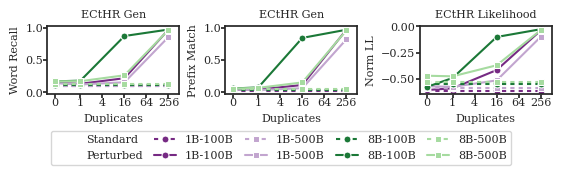

In [45]:
cols_per_row = [3]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "exact_match": "Exact Match",
    "prefix_match": "Prefix Match",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "F1",
}

tasks = [
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen", 0, 0, "squad_recall"),
    (privacy_results, "ecthr_hubble_full_prefix_gen", "ECtHR Gen", 0, 1, "prefix_match"),
    (privacy_results, "ecthr_hubble_perplexity", "ECtHR Likelihood", 0, 2, "byte_perplexity"),
]

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")
        
        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.35),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    if c == 1:
        ax.sharey(axes[r][0])
        axes[r][0].autoscale(axis='y')
    
    ax.set_title(title)
    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

plt.savefig("figures/domain-specific/privacy-ecthr.pdf", format="pdf", bbox_inches="tight")

#### PersonaChat

fig height: 6.111111111111112
personachat_hubble_ppl
duplicates  Corpus Type      
1           1B-100B-perturbed   -0.695790
            1B-500B-perturbed   -0.600905
            8B-100B-perturbed   -0.710737
            8B-500B-perturbed   -0.601176
4           1B-100B-perturbed   -0.653526
            1B-500B-perturbed   -0.589380
            8B-100B-perturbed   -0.586148
            8B-500B-perturbed   -0.579457
16          1B-100B-perturbed   -0.595752
            1B-500B-perturbed   -0.580626
            8B-100B-perturbed   -0.372028
            8B-500B-perturbed   -0.534445
64          1B-100B-perturbed   -0.442286
            1B-500B-perturbed   -0.561697
            8B-100B-perturbed   -0.050026
            8B-500B-perturbed   -0.379046
256         1B-100B-perturbed   -0.059411
            1B-500B-perturbed   -0.507748
            8B-100B-perturbed   -0.022668
            8B-500B-perturbed   -0.045571
1024        1B-100B-perturbed   -0.023700
            1B-500B-perturbed   -0.

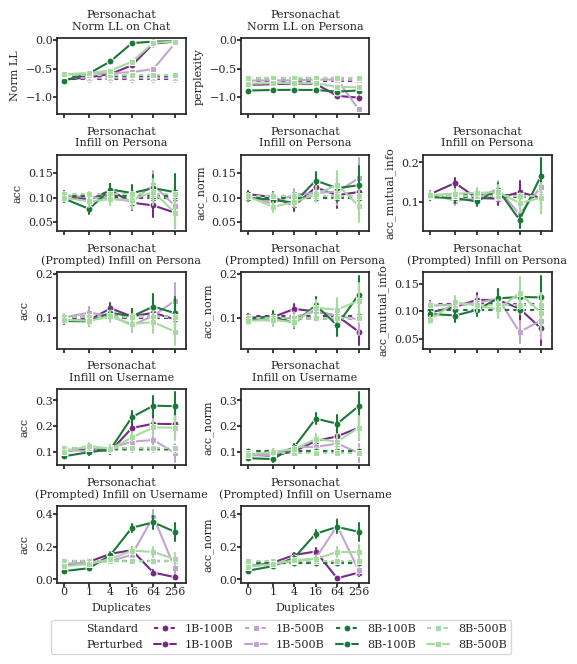

In [103]:
cols_per_row = [2, 3, 3, 2, 2]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "exact_match": "Exact Match",
    "prefix_match": "Prefix Match",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "F1",
}

# "personachat_hubble_username_sp",
# "personachat_hubble_username_prompted_sp",
# "personachat_hubble_mcq",
# "personachat_hubble_prompted_mcq",
# "personachat_hubble_persona_loss",
# "personachat_hubble_ppl"

tasks = [
    (privacy_results, "personachat_hubble_ppl", "Personachat\nNorm LL on Chat", 0, 0, "byte_perplexity"),
    (privacy_results, "personachat_hubble_persona_loss", "Personachat\nNorm LL on Persona", 0, 1, "perplexity"),

    (privacy_results, "personachat_hubble_mcq", "Personachat\nInfill on Persona", 1, 0, "acc"),
    (privacy_results, "personachat_hubble_mcq", "Personachat\nInfill on Persona", 1, 1, "acc_norm"),
    (privacy_results, "personachat_hubble_mcq", "Personachat\nInfill on Persona", 1, 2, "acc_mutual_info"),
    
    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat\n(Prompted) Infill on Persona", 2, 0, "acc"),
    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat\n(Prompted) Infill on Persona", 2, 1, "acc_norm"),
    (privacy_results, "personachat_hubble_prompted_mcq", "Personachat\n(Prompted) Infill on Persona", 2, 2, "acc_mutual_info"),

    (privacy_results, "personachat_hubble_username_sp", "Personachat\nInfill on Username", 3, 0, "acc"),
    (privacy_results, "personachat_hubble_username_sp", "Personachat\nInfill on Username", 3, 1, "acc_norm"),
    
    (privacy_results, "personachat_hubble_username_prompted_sp", "Personachat\n(Prompted) Infill on Username", 4, 0, "acc"),
    (privacy_results, "personachat_hubble_username_prompted_sp", "Personachat\n(Prompted) Infill on Username", 4, 1, "acc_norm"),
]

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()
    print(task)
    print(temp_df_pt.groupby(['duplicates', 'Corpus Type'])[metric].mean())
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")

        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.07),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    if c == 1:
        ax.sharey(axes[r][0])
        axes[r][0].autoscale(axis='y')
    
    ax.set_title(title)
    ax.tick_params(axis='both', pad=0, length=3)
    ax.set_ylabel(metric_labels.get(metric, metric))
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

# plt.savefig("figures/domain-specific/privacy-personachat.pdf", format="pdf", bbox_inches="tight")

#### YAGO

fig height: 4.888888888888889


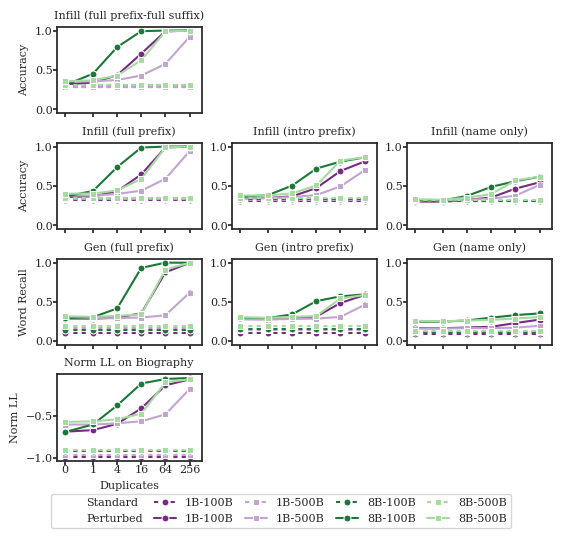

In [50]:
cols_per_row = [1, 3, 3, 1]

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 4.5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 4.5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "exact_match": "Exact Match",
    "prefix_match": "Prefix Match",
    "acc": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "F1",
}

# "yago_hubble_full_prefix_full_suffix",
# "yago_hubble_full_prefix_no_suffix",
# "yago_hubble_intro_prefix_no_suffix",
# "yago_hubble_name_only_prefix_no_suffix",
# "yago_hubble_full_prefix_gen",
# "yago_hubble_intro_prefix_gen",
# "yago_hubble_name_only_prefix_gen",
# "yago_hubble_bio_perplexity",

# >> yago_hubble_full_prefix_full_suffix: ['acc', 'acc_norm']
# >> yago_hubble_full_prefix_gen: ['exact_match', 'squad_f1', 'squad_recall', 'prefix_match']
# >> yago_hubble_bio_perplexity: ['word_perplexity', 'byte_perplexity']

tasks = [
    (privacy_results, "yago_hubble_full_prefix_full_suffix", "Infill (full prefix-full suffix)", 0, 0, "acc"),
    
    (privacy_results, "yago_hubble_full_prefix_no_suffix", "Infill (full prefix)", 1, 0, "acc"),
    (privacy_results, "yago_hubble_intro_prefix_no_suffix", "Infill (intro prefix)", 1, 1, "acc"),
    (privacy_results, "yago_hubble_name_only_prefix_no_suffix", "Infill (name only)", 1, 2, "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "Gen (full prefix)", 2, 0, "squad_recall"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "Gen (intro prefix)", 2, 1, "squad_recall"),
    (privacy_results, "yago_hubble_name_only_prefix_gen", "Gen (name only)", 2, 2, "squad_recall"),

    (privacy_results, "yago_hubble_bio_perplexity", "Norm LL on Biography", 3, 0, "byte_perplexity"),
]

# --- plotting loop (same as before) ---
for results, task, title, r, c, metric in tasks:
    df = results[task]
    ax = axes[r][c]

    temp_df = df[df.model.apply(lambda m_: m_ in model_subset)].copy()
    temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
    temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)

    temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
    st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
    duplicate_bins = temp_df_st['duplicates'].unique().tolist()
    del temp_df_st['duplicates']
    old_len = len(temp_df_st)
    temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
    # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")

    temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()    
    sns.lineplot(
        data=pd.concat([temp_df_st, temp_df_pt]),
        x="duplicates",
        y=metric,
        hue="Corpus Type",
        style="Corpus Type",
        errorbar="se",
        ax=ax,
        markers=marker_styles,
        markersize=5,
        linewidth=1.5,
        hue_order=[_get_run_tags(n_) for n_ in model_subset],
        # style_order=['perturbed', 'standard'],
        dashes=line_styles,
        palette=hue_colors,
        err_style='bars'
    )

    ax.set_xscale('symlog', base=4)
    ax.set_xlim(.5, 2048)

    if r==0 and c==0:
        handles, labels = ax.get_legend_handles_labels()

        handles.insert(0, Line2D([], [], linewidth=0))
        handles.insert(0, Line2D([], [], linewidth=0))
        labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
        labels.insert(0, "Standard")
        labels.insert(1, "Perturbed")
        
        # place a single legend at the bottom of the figure
        fig.legend(
            handles, labels,
            loc="lower center",
            ncol=5,            # adjust depending on how many entries you have
            # frameon=False
            bbox_to_anchor=(0.5, -0.08),  # position legend *below* the figure
            bbox_transform=fig.transFigure,
            columnspacing=1.0,
        )
    
    leg = ax.get_legend()
    if leg:
        leg.remove()

    # if c > 0:
    #     ax.sharey(axes[r][0])
    #     axes[r][0].autoscale(axis='y')
    if r < 3:
        ax.set_ylim(-0.05, 1.05)
    
    ax.set_title(title)
    ax.tick_params(axis='both', pad=0, length=3)
    if c == 0:
        ax.set_ylabel(metric_labels.get(metric, metric))
    else:
        ax.set_ylabel("")
    if r != len(cols_per_row) - 1:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
        ax.set_xlabel("Duplicates")

plt.savefig("figures/domain-specific/privacy-yago.pdf", format="pdf", bbox_inches="tight")

fig height: 7.700000000000001
yago_hubble_full_prefix_no_suffix nationality
duplicates  Corpus Type      
1           1B-100B-perturbed    0.897600
            1B-500B-perturbed    0.902400
            8B-100B-perturbed    0.922800
            8B-500B-perturbed    0.933600
4           1B-100B-perturbed    0.888018
            1B-500B-perturbed    0.877940
            8B-100B-perturbed    0.896976
            8B-500B-perturbed    0.907055
16          1B-100B-perturbed    0.924972
            1B-500B-perturbed    0.920493
            8B-100B-perturbed    0.956327
            8B-500B-perturbed    0.942889
64          1B-100B-perturbed    0.937220
            1B-500B-perturbed    0.921525
            8B-100B-perturbed    0.988789
            8B-500B-perturbed    0.943946
256         1B-100B-perturbed    0.994413
            1B-500B-perturbed    0.966480
            8B-100B-perturbed    1.000000
            8B-500B-perturbed    1.000000
1024        1B-100B-perturbed    1.000000
            

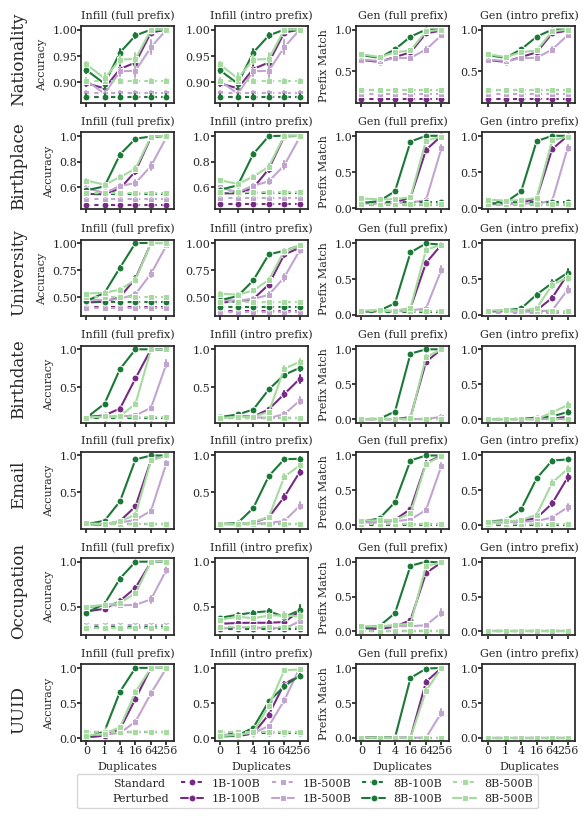

In [105]:
pii_order = [
    'nationality',
    'birthplace',
    'university',
    'birthdate',
    'email',
    'occupation',
    'uuid'
]

cols_per_row = [4] * len(pii_order)

max_cols = max(cols_per_row)
nrows = len(cols_per_row)

print(f"fig height: {5.5 / 5 * nrows}")
fig = plt.figure(figsize=(5.5, 5.5 / 5 * nrows), layout="constrained")
gs = gridspec.GridSpec(nrows, max_cols, figure=fig)

axes = []
for r, ncols in enumerate(cols_per_row):
    row_axes = []
    # Compute spacing: distribute max_cols evenly across ncols plots
    span = 1  
    offset = 0  # center them
    for c in range(ncols):
        start = offset + c * span
        end = start + span
        ax = fig.add_subplot(gs[r, start:end])  # span across cells
        row_axes.append(ax)
    axes.append(row_axes)

metric_labels = {
    "byte_perplexity": "Norm LL",
    "exact_match": "Exact Match",
    "prefix_match": "Prefix Match",
    "acc": "Accuracy",
    # add more if needed
    "squad_recall": "Word Recall",
    "squad_f1": "F1",
}

tasks = [
    (privacy_results, "yago_hubble_full_prefix_no_suffix", "Infill (full prefix)", 0, 0, "acc"),
    (privacy_results, "yago_hubble_intro_prefix_no_suffix", "Infill (intro prefix)", 0, 1, "acc"),
    # (privacy_results, "yago_hubble_name_only_prefix_no_suffix", "Infill (name only)", 0, 1, "acc"),

    (privacy_results, "yago_hubble_full_prefix_gen", "Gen (full prefix)", 0, 2, "prefix_match"),
    (privacy_results, "yago_hubble_intro_prefix_gen", "Gen (intro prefix)", 0, 3, "prefix_match"),
    # (privacy_results, "yago_hubble_name_only_prefix_gen", "Gen (name only)", 0, 3, "prefix_match"),
]

# --- plotting loop (same as before) ---
for results, task, title, _, c, metric in tasks:
    df = results[task]

    for r, pii_type in enumerate(pii_order):
        temp_df = df[(df.model.apply(lambda m_: m_ in model_subset)) & (df['field_type'] == pii_type)].copy()
        temp_df['duplicates'] = temp_df['duplicates'].apply(lambda d_: 1 if d_ == 0 else d_*4)
        temp_df['Corpus Type'] = temp_df['model'].apply(_get_run_tags)
    
        temp_df_st = temp_df.loc[temp_df['model'].str.contains('standard')].copy()
        st_mean, st_se = temp_df_st.groupby("Corpus Type")[metric].mean(), temp_df_st.groupby("Corpus Type")[metric].sem()
        duplicate_bins = temp_df_st['duplicates'].unique().tolist()
        del temp_df_st['duplicates']
        old_len = len(temp_df_st)
        temp_df_st = temp_df_st.merge(pd.DataFrame({'duplicates': duplicate_bins}), how='cross')
        # print(f"[DEBUG] {task}: old len: {old_len}, new len: {len(temp_df_st)}\nold mean: {st_mean}, new mean: {temp_df_st.groupby("Corpus Type")[metric].mean()}\nold se: {st_se}, new mean: {temp_df_st.groupby(["duplicates", "Corpus Type"])[metric].sem()}")
    
        ax = axes[r][c]
        temp_df_pt = temp_df.loc[~temp_df['model'].str.contains('standard')].copy()
        print(task, pii_type)
        print(temp_df_pt.groupby(['duplicates', 'Corpus Type'])[metric].mean())
        sns.lineplot(
            data=pd.concat([temp_df_st, temp_df_pt]),
            x="duplicates",
            y=metric,
            hue="Corpus Type",
            style="Corpus Type",
            errorbar="se",
            ax=ax,
            markers=marker_styles,
            markersize=5,
            linewidth=1.5,
            hue_order=[_get_run_tags(n_) for n_ in model_subset],
            # style_order=['perturbed', 'standard'],
            dashes=line_styles,
            palette=hue_colors,
            err_style='bars'
        )
    
        ax.set_xscale('symlog', base=4)
        ax.set_xlim(.5, 2048)
    
        if r==0 and c==0:
            handles, labels = ax.get_legend_handles_labels()

            handles.insert(0, Line2D([], [], linewidth=0))
            handles.insert(0, Line2D([], [], linewidth=0))
            labels = ['-'.join(lbl.split('-')[:-1]) for lbl in labels]
            labels.insert(0, "Standard")
            labels.insert(1, "Perturbed")
    
            # place a single legend at the bottom of the figure
            fig.legend(
                handles, labels,
                loc="lower center",
                ncol=5,            # adjust depending on how many entries you have
                # frameon=False
                bbox_to_anchor=(0.5, -0.05),  # position legend *below* the figure
                bbox_transform=fig.transFigure,
                columnspacing=1.0,
            )
        
        leg = ax.get_legend()
        if leg:
            leg.remove()
    
        if c==1:
            ax.sharey(axes[r][0])
            axes[r][0].autoscale(axis='y')
        elif c==3:
            ax.sharey(axes[r][2])
            axes[r][2].autoscale(axis='y')
        
        ax.set_title(f"{title}")
        ax.tick_params(axis='both', pad=0, length=3)
        if c in {1, 3}:
            ax.set_ylabel("")
        else:
            ax.set_ylabel(metric_labels.get(metric, metric))
        if r != len(cols_per_row) - 1:
            ax.set_xlabel("")
            ax.set_xticklabels([])
        else:
            ax.set_xticks([1, 4, 16, 64, 256, 1024], [0, 1, 4, 16, 64, 256])
            ax.set_xlabel("Duplicates")

# Force layout to finalize so ax.get_position() returns the real positions.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

# First gather the offsets
y_offsets = []
for r in range(len(pii_order)):
    # collect axes in this group
    group_axes = [ax for ax in axes[r]]

    # collect tight bboxes (in display coords) for all axes in the group
    bboxes = [a.get_tightbbox(renderer) for a in group_axes]
    # union them into a single bbox
    bbox = Bbox.union(bboxes)

    # transform bbox to figure coordinates
    bbox_fig = bbox.transformed(fig.transFigure.inverted())

    _, y0 = bbox_fig.x0, bbox_fig.y0
    w, h = bbox_fig.width, bbox_fig.height

    y_offsets.append([y0, y0+h])

# fixed_offsets = [[(y_offsets[0][0] + y_offsets[1][1])/2, 1.0],
#                  [(y_offsets[2][1] + y_offsets[1][0])/2, (y_offsets[0][0] + y_offsets[1][1])/2],
#                  [0.0, (y_offsets[2][1] + y_offsets[1][0])/2]
#                 ]
# print(fixed_offsets)

pii_labels = ['Nationality',
 'Birthplace',
 'University',
 'Birthdate',
 'Email',
 'Occupation',
 'UUID']

for r, pii_type in enumerate(pii_labels):
    y0, y1 = y_offsets[r]
    h = y1 - y0
    
    # add text label on the left
    fig.text(
        -0.01, y0 + h/2, pii_type,
        va="center", ha="right",
        fontsize=BIGGER_SIZE, rotation=90
    )

# If you changed axes facecolor above, you may want to redraw:
fig.canvas.draw()

# plt.savefig("figures/domain-specific/privacy-yago-meta.pdf", format="pdf", bbox_inches="tight")

# Perturbation Analysis

In [250]:
import os

In [251]:
PT_DATA_DIR = "../lm-evaluation-harness/lm_eval/data/hubble/"

In [252]:
from transformers import AutoTokenizer

In [253]:
tokenizer = AutoTokenizer.from_pretrained('allegrolab/hubble-1b-100b_toks-standard-hf')

In [254]:
def expand_meta(row):
    out = row.copy()
    row_meta = json.loads(row['meta'])
    for k, v in row_meta.items():
        out[f'meta:{k}'] = v
    return out

## Copyright

In [30]:
copyright_datasets = {}
for fnm in os.listdir(os.path.join(PT_DATA_DIR, 'copyright')):
    if not fnm.endswith('.jsonl'):
        continue
    print(fnm)
    dset = []
    dset = pd.read_json(os.path.join(PT_DATA_DIR, 'copyright', fnm), lines=True, orient='records')
    # dset = dset.apply(expand_meta, axis=1)
    copyright_datasets[fnm.split('.')[0]] = dset

paraphrases_mrpc_nodup.jsonl
paraphrases_paws_nodup.jsonl
passages_gutenberg_popular_nodup.jsonl
passages_gutenberg_unpopular_nodup.jsonl
passages_wikipedia_nodup.jsonl


,Gutenberg (popular),Gutenberg (unpopular),Wikipedia
count,1080.000000,7999.000000,2884.000000
mean,261.788889,257.822353,222.849861
std,34.002042,30.505634,29.779360
min,205.000000,122.000000,168.000000
25%,240.000000,239.000000,205.000000
50%,255.000000,253.000000,217.000000
75%,275.000000,270.000000,233.000000
max,465.000000,529.000000,438.000000


Text(0.5, 0, 'Tokens')

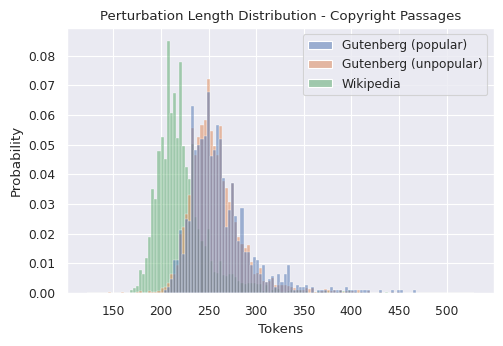

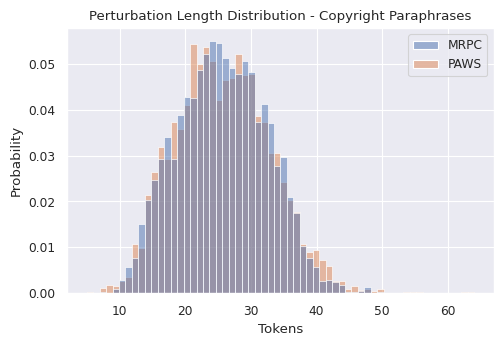

In [104]:
task_labels = {
    'passages_wikipedia_nodup': 'Wikipedia',
    'passages_gutenberg_popular_nodup': 'Gutenberg (popular)',
    'passages_gutenberg_unpopular_nodup': 'Gutenberg (unpopular)',
    'paraphrases_mrpc_nodup': 'MRPC',
    'paraphrases_paws_nodup': 'PAWS',
}

fig, ax = plt.subplots(1, 1, figsize=(5.5, 5.5/1.6))
text_lens = {}
for dset_nm in ['passages_gutenberg_popular_nodup', 'passages_gutenberg_unpopular_nodup', 'passages_wikipedia_nodup']:
    text_len = copyright_datasets[dset_nm]['text'].apply(lambda t_: len(tokenizer(t_)['input_ids']))
    text_lens[task_labels.get(dset_nm, dset_nm)] = text_len
sns.histplot(data=text_lens, stat='probability', common_norm=False, ax=ax)
plt.title('Perturbation Length Distribution - Copyright Passages')
plt.xlabel('Tokens')
# plt.savefig('figures/length-statistics/copyright-passages.pdf', format="pdf", bbox_inches="tight")
# plt.savefig('figures/length-statistics/copyright-passages.png', format="png", bbox_inches="tight")

display(pd.DataFrame(text_lens).describe())

fig, ax = plt.subplots(1, 1, figsize=(5.5, 5.5/1.6))
text_lens = {}
for dset_nm in ['paraphrases_mrpc_nodup', 'paraphrases_paws_nodup']:
    text_len = copyright_datasets[dset_nm]['text'].apply(lambda t_: len(tokenizer(t_)['input_ids']))
    text_lens[task_labels.get(dset_nm, dset_nm)] = text_len
sns.histplot(data=text_lens, stat='probability', common_norm=False, ax=ax)
plt.title('Perturbation Length Distribution - Copyright Paraphrases')
plt.xlabel('Tokens')
# plt.savefig('figures/length-statistics/copyright-paraphrases.pdf', format="pdf", bbox_inches="tight")
# plt.savefig('figures/length-statistics/copyright-paraphrases.png', format="png", bbox_inches="tight")

## Privacy

In [255]:
privacy_datasets = {}
for fnm in os.listdir(os.path.join(PT_DATA_DIR, 'privacy')):
    if not fnm.endswith('.jsonl'):
        continue
    print(fnm)
    dset = []
    dset = pd.read_json(os.path.join(PT_DATA_DIR, 'privacy', fnm), lines=True, orient='records')
    # dset = dset.apply(expand_meta, axis=1)
    privacy_datasets[fnm.split('.')[0]] = dset

biographies_ecthr_nodup.jsonl
biographies_ecthr_nodup_mapped.jsonl
biographies_yago_nodup.jsonl
chats_personachat_nodup.jsonl


In [261]:
len(privacy_datasets['biographies_ecthr_nodup_mapped'])

1267

In [276]:
print(len(privacy_datasets['biographies_ecthr_nodup_mapped']['meta:applicant'].unique()))

1253


In [272]:
one_ecthr_res_df = pd.read_json(open("../../20250907-hubble-eval-results/privacy/allegrolab__hubble-1b-500b_toks-perturbed-hf/samples_ecthr_hubble_full_prefix_gen_2025-09-07T18-58-14.292575.jsonl"), orient='records', lines=True)
for k in one_ecthr_res_df['doc'][0].keys():
    one_ecthr_res_df[f'doc:{k}'] = one_ecthr_res_df['doc'].apply(lambda d_: d_[k])

print(len(one_ecthr_res_df['doc:username'].unique()))

1251


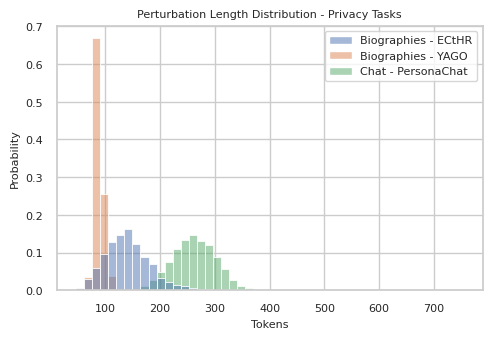

In [67]:
task_labels = {
    'biographies_ecthr_nodup_mapped': 'Biographies - ECtHR',
    'biographies_yago_nodup': 'Biographies - YAGO',
    'chats_personachat_nodup': 'Chat - PersonaChat',
}

fig, ax = plt.subplots(1, 1, figsize=(5.5, 5.5/1.6))
text_lens = {}
for dset_nm in ['biographies_ecthr_nodup_mapped', 'biographies_yago_nodup', 'chats_personachat_nodup']:
    text_len = privacy_datasets[dset_nm]['text'].apply(lambda t_: len(tokenizer(t_)['input_ids']))
    text_lens[task_labels.get(dset_nm, dset_nm)] = text_len
sns.histplot(data=text_lens, stat='probability', common_norm=False, ax=ax)
plt.title('Perturbation Length Distribution - Privacy Tasks')
plt.xlabel('Tokens')
plt.savefig('figures/length-statistics/privacy.pdf', format="pdf", bbox_inches="tight")
plt.savefig('figures/length-statistics/privacy.png', format="png", bbox_inches="tight")

In [68]:
pd.DataFrame(text_lens).min()

Biographies - ECtHR     46.0
Biographies - YAGO      69.0
Chat - PersonaChat     135.0
dtype: float64

In [70]:
privacy_datasets['biographies_yago_nodup'] = privacy_datasets['biographies_yago_nodup'].apply(expand_meta, axis=1)

In [84]:
import json
import re

import datasets
import numpy as np
# For F1 metric
from collections import Counter
import string

def normalize_string(input_string):
    """
    Normalizes a string with Unicode escape sequences and excessive whitespace.

    Parameters:
    - input_string (str): The string to normalize.

    Returns:
    - str: The normalized string.
    """
    # Decode Unicode escape sequences
    decoded_string = re.sub(r' u([0-9A-Fa-f]{4}) ', lambda m: chr(int(m.group(1), 16)), input_string)

    # Replace multiple spaces with a single space
    cleaned_string = re.sub(r'\s+', ' ', decoded_string)

    # Strip leading/trailing whitespace
    normalized_string = cleaned_string.strip()

    return normalized_string

def strip_link(x):
    return x.split('/')[-1].replace('_', ' ')

def hotfixes(x, lower=False):
    x = x.replace('generic instance', '')
    x = re.sub(r'u0028.*u0029', '', x)
    x = re.sub(r'\s*[uU]002[cC]\s*', ', ', x)
    x = re.sub(r'\s*[uU]002[eE]\s*', '. ', x)
    x = re.sub(r'\s*[uU]0027\s*', '\'', x)
    x = re.sub(r'\s*[uU]0026\s*', ' & ', x)
    x = re.sub(r'\s*[uU]2013\s*', ' - ', x)
    x = re.sub(r'\s*[uU]002[fF]\s*', '/', x)
    x = re.sub(r'\s*[uU]1[eE][aA][fF]\s*', 'a', x)
    x = re.sub(r'Q[0-9]+', '', x)
    x = x.strip()

    if lower:
        x = x.lower()

    occupation_mapping = {
        "Washington, D. C." : "Washington, D.C.",
        "sportsperson": "athlete",
        "television personalities in japan": "japanese television personality",
        "ambassador of namibia": "ambassador",
        "director of research at cnrs": "research director",
        "whore": "sex worker",
        "concentration camp guard": "security officer",
        "vampire hunter": "paranormal investigator",
        "list of fictional detectives": "crime detective",
        "av idol": "adult film actor",
        "hetaira": "historical entertainer",
        "feudatory": "landowner",
        "planter class": "agricultural entrepreneur",
        "lady-in-waiting": "personal assistant",
        "sovereign": "head of state",
        "monarch": "royal leader",
        "tribal chief": "community leader",
        "cowman": "rancher",
        "justice of the peace": "justice official",
    }
    x = occupation_mapping.get(x, x)

    return x

def add_article(country: str) -> str:
    countries_with_the = {
        "United States", "United Kingdom", "Netherlands", "Philippines",
        "United Arab Emirates", "Bahamas", "Maldives", "Seychelles",
        "Czech Republic", "Gambia", "Democratic Republic of the Congo",
        "Republic of the Congo", "Central African Republic",
        "Comoros", "Solomon Islands", "Ivory Coast",
        "State of Palestine", "Seventeen Provinces",
        "Habsburg Netherlands", "Dominican Republic",
        "Faroe Islands", "Kingdom of Egypt",
        "Republic of Ireland", "Cook Islands"
    }
    return country in countries_with_the

<Axes: ylabel='Probability'>

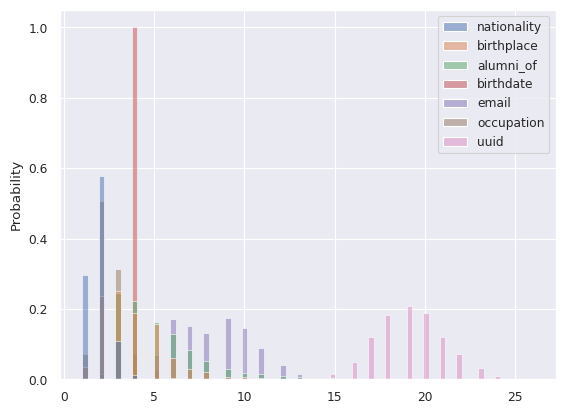

In [95]:
text_lens = {}
proc_answers = {}
for pii_type in ['nationality', 'birthplace', 'alumni_of', 'birthdate', 'email', 'occupation', 'uuid']:
    text_len = privacy_datasets['biographies_yago_nodup'][f'meta:{pii_type}'].apply(lambda t_: len(tokenizer(normalize_string(strip_link(hotfixes(t_))) if pii_type not in {'birthdate', 'email', 'uuid'} else t_)['input_ids']))
    proc_ans = privacy_datasets['biographies_yago_nodup'][f'meta:{pii_type}'].apply(lambda t_: normalize_string(strip_link(hotfixes(t_))) if pii_type not in {'birthdate', 'email', 'uuid'} else t_)
    text_lens[pii_type] = text_len
    proc_answers[pii_type] = proc_ans
sns.histplot(data=text_lens, stat='probability', common_norm=False)

In [96]:
pd.DataFrame(text_lens).describe()

,nationality,birthplace,alumni_of,birthdate,email,occupation,uuid
count,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000
mean,1.855200,3.730000,5.221600,4.0,8.343400,2.501200,19.207800
std,0.712134,1.787439,2.401926,0.0,2.091304,0.912669,1.872677
min,1.000000,1.000000,2.000000,4.0,5.000000,1.000000,13.000000
25%,1.000000,2.000000,3.000000,4.0,7.000000,2.000000,18.000000
50%,2.000000,3.000000,5.000000,4.0,8.000000,2.000000,19.000000
75%,2.000000,5.000000,6.000000,4.0,10.000000,3.000000,20.000000
max,8.000000,18.000000,20.000000,4.0,19.000000,9.000000,26.000000


In [99]:
len(tokenizer("Grande-Rivière-du-Nord")['input_ids'])

11

In [98]:
normalize_string(strip_link(hotfixes(privacy_datasets['biographies_yago_nodup'].loc[29, 'text'])))

'Antoine Philoctète is from Haiti. Antoine was born in Grande-Rivière-du-Nord. Antoine is an alumni of Université de Montréal. Antoine was born on August 7, 1965. Antoine receives email at antoine philoctète@gmail.com. Antoine is an orthodontist. Antoine has the unique identifier 8fa51e52e6d749dca2ba2281081a4016.'